# import data and preprocessing

In [ ]:
#first dataset:hepatitis

In [53]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.colors import LogNorm
import plotly.graph_objects as go
import plotly.express as px
import sys
%matplotlib inline 
import numpy as np
import time
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#the output of plotting commands is displayed inline within frontends
%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging 
!pip install imgaug==0.2.5
!pip install matplotlib --upgrade

#read file hepatitis.data
df_hepatitis = pd.read_csv("hepatitis.csv",header=None)
#read header

df_hepatitis.columns = ['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise',
                        'Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders','Ascites',
                        'Varices','Bilirubin','AlkPhosphate','Sgot','Albumin','Protime','Histology']

# Removing missing or malformed features 
df_hepatitis=df_hepatitis.drop('Protime', axis=1)
df_hepatitis = df_hepatitis[~df_hepatitis.eq('?').any(1)]
df_hepatitis=df_hepatitis.apply(pd.to_numeric)
#convert class label as 1（positive） and 0（negative）and categorical variable as 1 and 0 
l = list(range(2,14))
l.append(0)
l.append(18)
df_hepatitis.insert(19,"Class2",df_hepatitis['Class'])
for i in l:
  df_hepatitis.iloc[:,i].replace({2: 0}, inplace=True)
df_hepatitis = df_hepatitis.apply(pd.to_numeric)

print(df_hepatitis)



     Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0        0   30    0        1           0        0        0         0   
1        0   50    1        1           0        1        0         0   
2        0   78    1        0           0        1        0         0   
5        0   34    1        0           0        0        0         0   
10       0   39    1        1           1        0        0         0   
..     ...  ...  ...      ...         ...      ...      ...       ...   
149      0   36    1        0           0        0        0         0   
151      0   44    1        0           0        1        0         0   
152      0   61    1        1           0        1        1         0   
153      0   53    0        1           0        1        0         0   
154      1   43    1        0           0        1        0         0   

     LiverBig  LiverFirm  SpleenPalpable  Spiders  Ascites  Varices  \
0           1          0               0        0   

In [54]:

np.random.seed(1236)
hepatitis_x= df_hepatitis.drop(['Class','Class2'],axis=1).to_numpy() 
hepatitis_y=df_hepatitis['Class'].to_numpy()
hepatitis2_y=df_hepatitis['Class2'].to_numpy()

(N,D), C = hepatitis_x.shape, np.max(hepatitis_y)
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
#split the data into training set and testing set
hepatitis_data_num = hepatitis_x.shape[0]
hepa_partition = int(hepatitis_data_num*0.8)
hepa_inds = np.random.permutation(hepatitis_data_num)

#first split the whole dataset into training and testing
hepa_x_train, hepa_y_train = hepatitis_x[hepa_inds[:hepa_partition]], hepatitis_y[hepa_inds[:hepa_partition]]
hepa_x_test, hepa_y_test = hepatitis_x[hepa_inds[hepa_partition:]], hepatitis_y[hepa_inds[hepa_partition:]]
#class= 1 and 2
hepatitis_y_train,hepatitis_y_test=hepatitis2_y[hepa_inds[:hepa_partition]],hepatitis2_y[hepa_inds[hepa_partition:]]
#slpit the training dataset into training and validation
hepa_partition2 = int(hepa_x_train.shape[0]*0.8)
hepa_inds2 = np.random.permutation(hepa_x_train.shape[0])
hepa_x_train2, hepa_y_train2 = hepa_x_train[hepa_inds2[:hepa_partition2]], hepa_y_train[hepa_inds2[:hepa_partition2]]
hepa_x_vali, hepa_y_vali = hepa_x_train[hepa_inds2[hepa_partition2:]], hepa_y_train[hepa_inds2[hepa_partition2:]]
#class=1 or 2
hepatitis_y_train2=hepatitis_y_train[hepa_inds2[:hepa_partition2]]
shape(hepa_x_train2)

instances (N) 	 112 
 features (D) 	 18 
 classes (C) 	 1


(71, 18)

In [55]:
#standardizing features


hepa_x_train_mod = hepa_x_train2.copy()
hepa_x_test_mod = hepa_x_test.copy()
hepa_x_vali_mod = hepa_x_vali.copy()

hepa_x_train_mod[:,0] = hepa_x_train_mod[:,0] * 100
hepa_x_test_mod[:,0] = hepa_x_test_mod[:,0] * 100
hepa_x_vali_mod[:,0] = hepa_x_vali_mod[:,0] * 100

for d in range(hepa_x_train.shape[1]):
    hepa_x_train_mod[:,d] = (hepa_x_train_mod[:,d] - hepa_x_train_mod[:,d].mean())/hepa_x_train_mod[:,d].std()
    hepa_x_test_mod[:,d] = (hepa_x_test_mod[:,d] - hepa_x_test_mod[:,d].mean())/hepa_x_test_mod[:,d].std()
    hepa_x_vali_mod[:,d] = (hepa_x_vali_mod[:,d] - hepa_x_vali_mod[:,d].mean())/hepa_x_vali_mod[:,d].std()




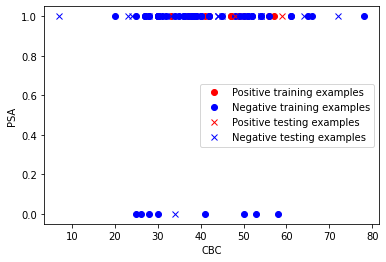

In [56]:
#visualization of hepatitis data points
plt.clf()
positive_train = hepa_y_train2==1
negative_train = hepa_y_train2==0

positive_test = hepa_y_test==1
negative_test = hepa_y_test==0

plt.plot(hepa_x_train2[positive_train,0],hepa_x_train2[positive_train,1],"or",label="Positive training examples")
plt.plot(hepa_x_train2[negative_train,0],hepa_x_train2[negative_train,1],"ob",label="Negative training examples")

plt.plot(hepa_x_test[positive_test,0],hepa_x_test[positive_test,1],"xr",label="Positive testing examples")
plt.plot(hepa_x_test[negative_test,0],hepa_x_test[negative_test,1],"xb",label="Negative testing examples")

plt.xlabel("CBC")
plt.ylabel("PSA")
plt.legend(loc='best')
plt.savefig("train_test_scatterplot.png", bbox_inches='tight', dpi=300)



In [8]:
#second dataset:messidor


In [117]:
#second dataset
df_messidor=pd.read_csv("messidor.csv",header=None)
 


            
df_messidor.columns = ['Quality','Pre-screening','MAdetectionCL0.5','MAdetectionCL0.6',
                                      'MAdetectionCL0.7','MAdetectionCL0.8','MAdetectionCL0.9',
                                      'MAdetectionCL1',"Exudates 0.3", "Exudates 0.4", "Exudates 0.5", "Exudates 0.6", "Exudates 0.7", "Exudates 0.8", 
                  "Exudates 0.9", "Exudates 1.0",'EuclidianDistance','OpticDiscDiameter','AM/FM-basedClass','SignofDR']


df_messidor=df_messidor.apply(pd.to_numeric)

messidor_np = df_messidor.to_numpy().astype(np.float)
df_messidor.insert(20,"SignofDR2",df_messidor['SignofDR'])

df_messidor["SignofDR2"].replace({0: 2}, inplace=True)
print(df_messidor)

      Quality  Pre-screening  MAdetectionCL0.5  MAdetectionCL0.6  \
0           1              1                22                22   
1           1              1                24                24   
2           1              1                62                60   
3           1              1                55                53   
4           1              1                44                44   
...       ...            ...               ...               ...   
1146        1              1                34                34   
1147        1              1                49                49   
1148        1              0                49                48   
1149        1              1                39                36   
1150        1              1                 7                 7   

      MAdetectionCL0.7  MAdetectionCL0.8  MAdetectionCL0.9  MAdetectionCL1  \
0                   22                19                18              14   
1                   22     

/var/folders/7v/wfr89tgx6b31zpsdpmqyz1d40000gn/T/ipykernel_5087/2994082.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  messidor_np = df_messidor.to_numpy().astype(np.float)


In [118]:
np.random.seed(1234)
messidor_x= df_messidor.drop(['SignofDR','SignofDR2'],axis=1).to_numpy() 
messidor_y=df_messidor['SignofDR'].to_numpy().astype(int)
mess_y=df_messidor['SignofDR2'].to_numpy().astype(int)
(N,D), C = messidor_x.shape, np.max(messidor_y)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
messidor_data_num = messidor_x.shape[0]
mess_partition = int(messidor_data_num*0.8)
mess_inds = np.random.permutation(messidor_data_num)

#first split the training into trianing and testing
messidor_y_train,messidor_y_test=mess_y[mess_inds[:mess_partition]],mess_y[mess_inds[mess_partition:]]
mess_x_train, mess_y_train = messidor_x[mess_inds[:mess_partition]], messidor_y[mess_inds[:mess_partition]]
mess_x_test, mess_y_test = messidor_x[mess_inds[mess_partition:]], messidor_y[mess_inds[mess_partition:]]
#then split the training into training and validation
mess_partition2 = int(mess_x_train.shape[0]*0.8)
mess_inds2 = np.random.permutation(mess_x_train.shape[0])
messidor_y_train2 = messidor_y_train[mess_inds2[:mess_partition2]]
mess_x_train2, mess_y_train2 = mess_x_train[mess_inds2[:mess_partition2]], mess_y_train[mess_inds2[:mess_partition2]]
mess_x_vali, mess_y_vali = mess_x_train[mess_inds2[mess_partition2:]],mess_y_train[mess_inds2[mess_partition2:]]


instances (N) 	 1151 
 features (D) 	 19 
 classes (C) 	 2


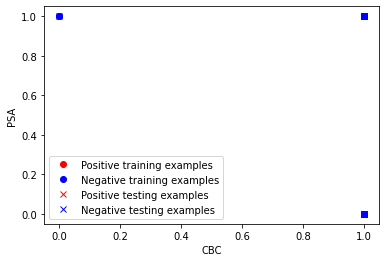

In [119]:
#visualization of messidor data points
plt.clf()
mess_positive_train = mess_y_train2==1
mess_negative_train = mess_y_train2==0

mess_positive_test = mess_y_test==1
mess_negative_test = mess_y_test==0

plt.plot(mess_x_train2[mess_positive_train,0],mess_x_train2[mess_positive_train,1],"or",label="Positive training examples")
plt.plot(mess_x_train2[mess_negative_train,0],mess_x_train2[mess_negative_train,1],"ob",label="Negative training examples")

plt.plot(mess_x_test[mess_positive_test,0],mess_x_test[mess_positive_test,1],"xr",label="Positive testing examples")
plt.plot(mess_x_test[mess_negative_test,0],mess_x_test[mess_negative_test,1],"xb",label="Negative testing examples")

plt.xlabel("CBC")
plt.ylabel("PSA")
plt.legend(loc='best')
plt.savefig("train_test_scatterplot.png", bbox_inches='tight', dpi=300)

In [14]:
#standardizing features


mess_x_train_mod = mess_x_train2.copy()
mess_x_test_mod = mess_x_test.copy()
mess_x_vali_mod = mess_x_vali.copy()

mess_x_train_mod[2:16] = mess_x_train_mod[2:16] * 100
mess_x_test_mod[2:16] = mess_x_test_mod[2:16] * 100
mess_x_vali_mod[2:16] = mess_x_vali_mod[2:16] * 100


mess_x_train_mod[2:16] = (mess_x_train_mod[2:16] - mess_x_train_mod[2:16].mean())/mess_x_train_mod[2:16].std()
mess_x_test_mod[2:16] = (mess_x_test_mod[2:16] - mess_x_test_mod[2:16].mean())/mess_x_test_mod[2:16].std()
mess_x_vali_mod[2:16] = (mess_x_vali_mod[2:16] - mess_x_vali_mod[2:16].mean())/mess_x_vali_mod[2:16].std()


# data statitics

In [15]:
#hepatitis dataset

In [16]:
df_hepatitis.describe()
df_hepatitis.info()
print(df_hepatitis.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           112 non-null    int64  
 1   Age             112 non-null    int64  
 2   Sex             112 non-null    int64  
 3   Steroid         112 non-null    int64  
 4   Antivirals      112 non-null    int64  
 5   Fatigue         112 non-null    int64  
 6   Malaise         112 non-null    int64  
 7   Anorexia        112 non-null    int64  
 8   LiverBig        112 non-null    int64  
 9   LiverFirm       112 non-null    int64  
 10  SpleenPalpable  112 non-null    int64  
 11  Spiders         112 non-null    int64  
 12  Ascites         112 non-null    int64  
 13  Varices         112 non-null    int64  
 14  Bilirubin       112 non-null    float64
 15  AlkPhosphate    112 non-null    int64  
 16  Sgot            112 non-null    int64  
 17  Albumin         112 non-null    flo

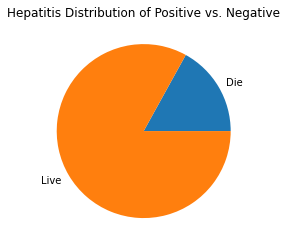

In [17]:
#class distribution
cla_pos = len(df_hepatitis[df_hepatitis["Class"].isin([1])])
cla_neg = len(df_hepatitis) - cla_pos


heplabels = ["Die", "Live"]
hepPNData = np.array([cla_pos, cla_neg])
plt.pie(hepPNData, labels=heplabels)
plt.title("Hepatitis Distribution of Positive vs. Negative")
plt.show()

In [18]:
df_hepatitis_stat = df_hepatitis.groupby('Class').agg({'Age':'mean','Bilirubin':'mean','Albumin':'mean','AlkPhosphate':'mean'})
df_hepatitis_stat

Age  Bilirubin   Albumin  AlkPhosphate
Class                                              
0      40.376344   1.120430  3.947312    102.225806
1      45.210526   2.015789  3.284211    121.473684

/var/folders/7v/wfr89tgx6b31zpsdpmqyz1d40000gn/T/ipykernel_5087/1137479367.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hepatitis_np = df_hepatitis.to_numpy().astype(np.float)


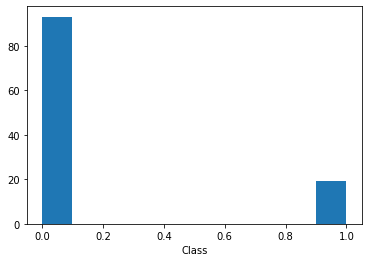

112 valid instances in hepatitis dataset, 19 instances are classified as DIE, 93 instances are classified as LIVE


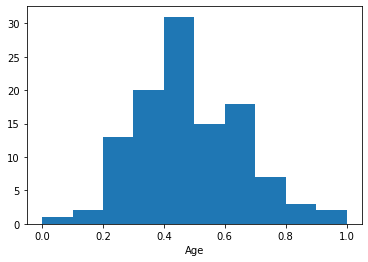

Variance of Age: 0.02902570098660373
Mean of Clump Age: 0.4816398390342052
Median of Clump Age: 0.4507042253521127


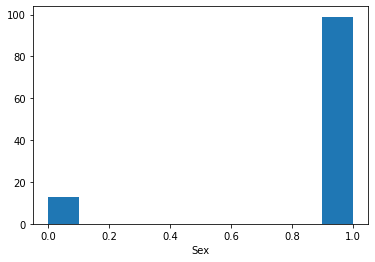

Variance of Sex: 0.10259885204081634
Mean of Clump Sex: 0.8839285714285714
Median of Clump Sex: 1.0


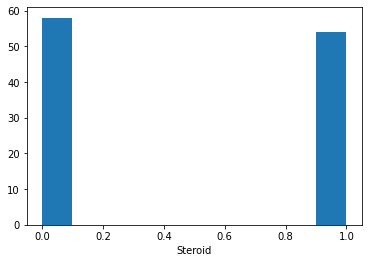

Variance of Steroid: 0.24968112244897953
Mean of Clump Steroid: 0.48214285714285715
Median of Clump Steroid: 0.0


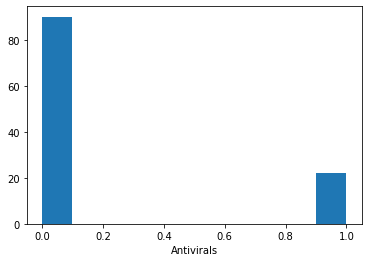

Variance of Antivirals: 0.15784438775510212
Mean of Clump Antivirals: 0.19642857142857142
Median of Clump Antivirals: 0.0


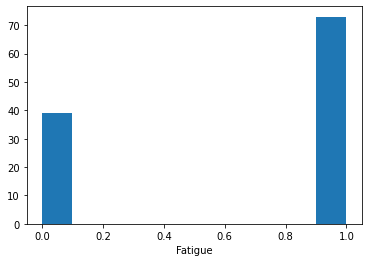

Variance of Fatigue: 0.22696109693877548
Mean of Clump Fatigue: 0.6517857142857143
Median of Clump Fatigue: 1.0


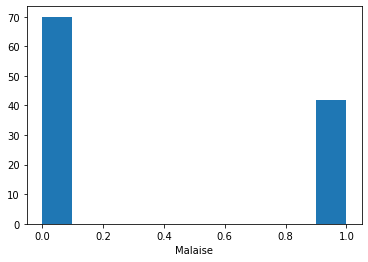

Variance of Malaise: 0.234375
Mean of Clump Malaise: 0.375
Median of Clump Malaise: 0.0


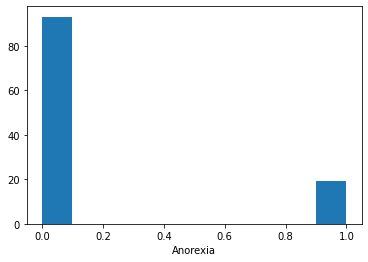

Variance of Anorexia: 0.14086415816326528
Mean of Clump Anorexia: 0.16964285714285715
Median of Clump Anorexia: 0.0


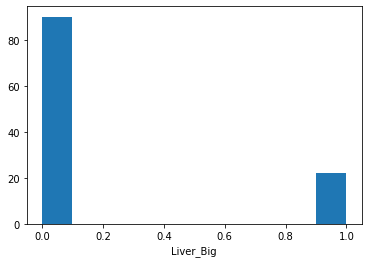

Variance of Liver_Big: 0.15784438775510207
Mean of Clump Liver_Big: 0.19642857142857142
Median of Clump Liver_Big: 0.0


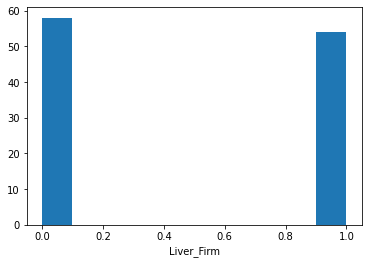

Variance of Liver_Firm: 0.24968112244897953
Mean of Clump Liver_Firm: 0.48214285714285715
Median of Clump Liver_Firm: 0.0


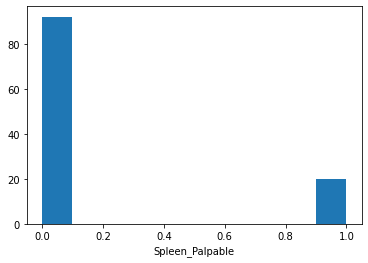

Variance of Spleen_Palpable: 0.1466836734693877
Mean of Clump Spleen_Palpable: 0.17857142857142858
Median of Clump Spleen_Palpable: 0.0


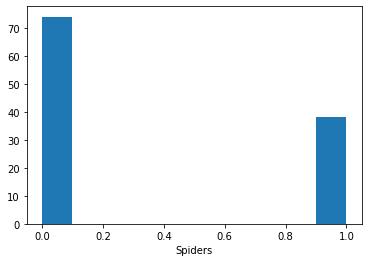

Variance of Spiders: 0.22417091836734696
Mean of Clump Spiders: 0.3392857142857143
Median of Clump Spiders: 0.0


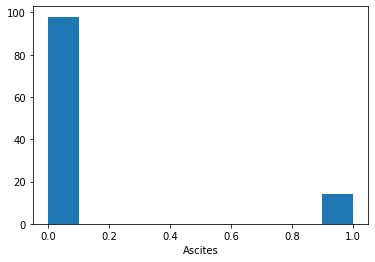

Variance of Ascites: 0.109375
Mean of Clump Ascites: 0.125
Median of Clump Ascites: 0.0


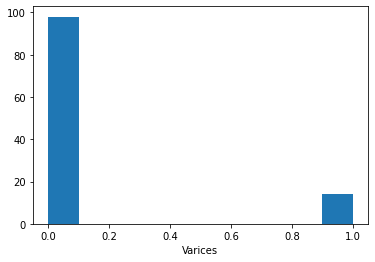

Variance of Varices: 0.109375
Mean of Clump Varices: 0.125
Median of Clump Varices: 0.0


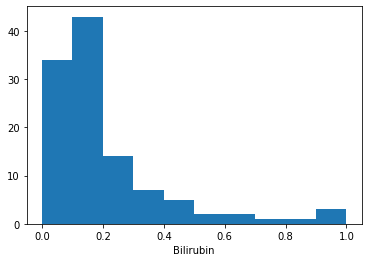

Variance of Bilirubin: 0.03844100371630133
Mean of Clump Bilirubin: 0.21607142857142853
Median of Clump Bilirubin: 0.15555555555555556


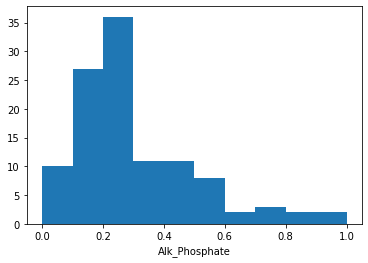

Variance of Alk_Phosphate: 0.038903157071516994
Mean of Clump Alk_Phosphate: 0.29550584174190125
Median of Clump Alk_Phosphate: 0.21933085501858737


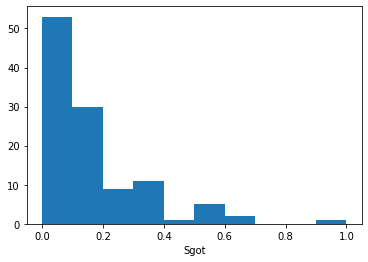

Variance of Sgot: 0.028427415900795148
Mean of Clump Sgot: 0.15915288529204785
Median of Clump Sgot: 0.10467980295566504


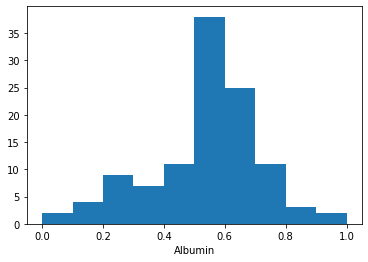

Variance of Albumin: 0.032151747723014996
Mean of Clump Albumin: 0.5421316964285714
Median of Clump Albumin: 0.59375


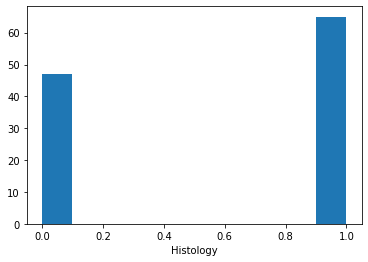

Variance of Histology: 0.24354272959183682
Mean of Clump Histology: 0.5803571428571429
Median of Clump Histology: 1.0


In [19]:
hepatitis_np = df_hepatitis.to_numpy().astype(np.float)
hepatitis_x = hepatitis_np[:,1:]
for i in range(hepatitis_x.shape[1]):
  hepatitis_x[:,i] = (hepatitis_x[:,i] - hepatitis_x[:,i].min())/(hepatitis_x[:,i].max() - hepatitis_x[:,i].min())   # rescaling the data st all data distributing in [0,1]
hepatitis_y = hepatitis_np[:,0].astype(int)


plt.hist(hepatitis_y)
plt.xlabel('Class')
plt.show()
die = np.count_nonzero(hepatitis_y==1)
live = np.count_nonzero(hepatitis_y==0)
print(f'{hepatitis_y.shape[0]} valid instances in hepatitis dataset, {die} instances are classified as DIE, {live} instances are classified as LIVE')

#plot the distribution of features of the first class
feature_dict = {'Age': hepatitis_x[:, 0], 
                'Sex': hepatitis_x[:, 1], 
                'Steroid': hepatitis_x[:, 2],
                'Antivirals': hepatitis_x[:, 3],
                'Fatigue': hepatitis_x[:, 4],
                'Malaise': hepatitis_x[:, 5],
                'Anorexia': hepatitis_x[:, 6],
                'Liver_Big': hepatitis_x[:, 7],
                'Liver_Firm': hepatitis_x[:, 8],
                'Spleen_Palpable': hepatitis_x[:, 9],
                'Spiders': hepatitis_x[:, 10],
                'Ascites': hepatitis_x[:, 11],
                'Varices': hepatitis_x[:, 12],
                'Bilirubin': hepatitis_x[:, 13],
                'Alk_Phosphate': hepatitis_x[:, 14],
                'Sgot': hepatitis_x[:, 15],
                'Albumin': hepatitis_x[:, 16],
                'Histology': hepatitis_x[:, 17],
                
                }

for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Variance of {name}: {np.var(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

Top Absolute Correlations
Class    Class2       1.000000
Ascites  Albumin      0.592257
Malaise  Anorexia     0.583525
Fatigue  Malaise      0.566170
Varices  Bilirubin    0.507568
dtype: float64


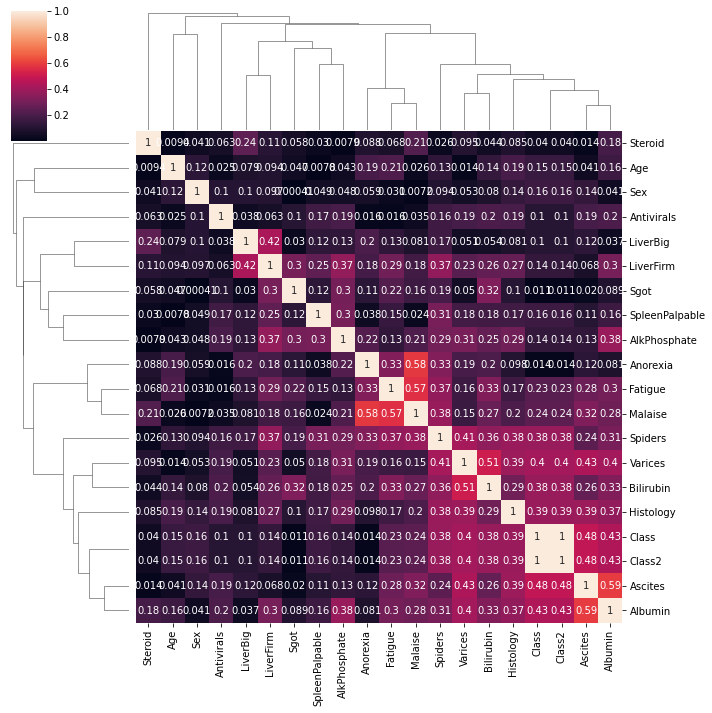

In [20]:
#correlation
hepatitis=df_hepatitis.apply(pd.to_numeric)#convert all data type to be numeric
#take the absolute values
hepatitis_corr=hepatitis.corr().abs()
plot_corr = sns.clustermap(data = hepatitis_corr,
                           metric="correlation",
                           annot=True,
                           )
plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)
#Calculate the top 5 correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(hepatitis, 5))


In [21]:
#basic statistics for messidor dataset
df_messidor.describe()
df_messidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quality            1151 non-null   int64  
 1   Pre-screening      1151 non-null   int64  
 2   MAdetectionCL0.5   1151 non-null   int64  
 3   MAdetectionCL0.6   1151 non-null   int64  
 4   MAdetectionCL0.7   1151 non-null   int64  
 5   MAdetectionCL0.8   1151 non-null   int64  
 6   MAdetectionCL0.9   1151 non-null   int64  
 7   MAdetectionCL1     1151 non-null   int64  
 8   Exudates 0.3       1151 non-null   float64
 9   Exudates 0.4       1151 non-null   float64
 10  Exudates 0.5       1151 non-null   float64
 11  Exudates 0.6       1151 non-null   float64
 12  Exudates 0.7       1151 non-null   float64
 13  Exudates 0.8       1151 non-null   float64
 14  Exudates 0.9       1151 non-null   float64
 15  Exudates 1.0       1151 non-null   float64
 16  EuclidianDistance  1151 

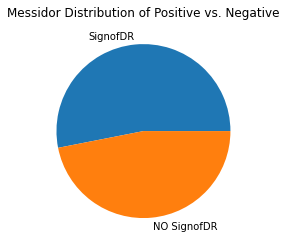

In [22]:
#class distribution
cla_pos = len(df_messidor[df_messidor["SignofDR"].isin([1])])
cla_neg = len(df_messidor) - cla_pos


heplabels = ["SignofDR", "NO SignofDR"]
hepPNData = np.array([cla_pos, cla_neg])
plt.pie(hepPNData, labels=heplabels)
plt.title("Messidor Distribution of Positive vs. Negative")
plt.show()

OpticDiscDiameter  MAdetectionCL0.5  MAdetectionCL0.6  \
SignofDR                                                          
0                  0.109020         30.457407         30.083333   
1                  0.107911         45.472995         42.942717   

          MAdetectionCL0.7  MAdetectionCL0.8  MAdetectionCL0.9  \
SignofDR                                                         
0                29.450000         27.862963         25.394444   
1                40.170213         36.216039         31.710311   

          MAdetectionCL1  Exudates 0.3  Exudates 0.4  Exudates 0.5  \
SignofDR                                                             
0              19.098148     60.489056     23.077008      8.233778   
1              22.965630     67.285077     23.097738      9.120730   

          Exudates 0.6  Exudates 0.7  Exudates 0.8  Exudates 0.9  \
SignofDR                                                           
0             1.401606      0.184963      0.042091      0.007343   
1             2.220838      0.892847      0.362711      0.154903   

          Exudates 1.0  EuclidianDistance  
SignofDR                                   
0             0.003486           0.522960  
1             0.067043           0.523435

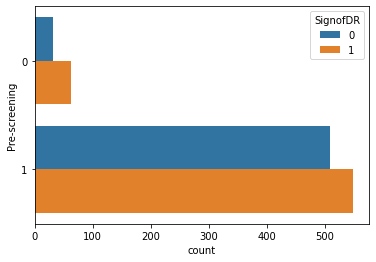

In [23]:
#feature distribution in different class
sns.countplot(y = 'Pre-screening', hue = 'SignofDR', data = df_messidor)
df_messidor['SignofDR'].value_counts()
df_messidor_stat = df_messidor.groupby('SignofDR').agg({'OpticDiscDiameter':'mean','MAdetectionCL0.5':'mean','MAdetectionCL0.6':'mean','MAdetectionCL0.7':'mean','MAdetectionCL0.8':'mean','MAdetectionCL0.9':'mean','MAdetectionCL1':'mean','Exudates 0.3':'mean','Exudates 0.4':'mean','Exudates 0.5':'mean','Exudates 0.6':'mean','Exudates 0.7':'mean','Exudates 0.8':'mean','Exudates 0.9':'mean','Exudates 1.0':'mean','EuclidianDistance':'mean'})
df_messidor_stat


/var/folders/7v/wfr89tgx6b31zpsdpmqyz1d40000gn/T/ipykernel_5087/1002227404.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  messidor_np = df_messidor.to_numpy().astype(np.float)


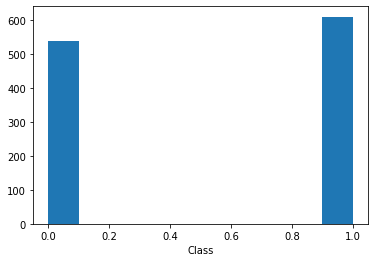

1151 valid instances in messidor dataset, 611 instances are classified as sign, 540 instances are classified as no_sign


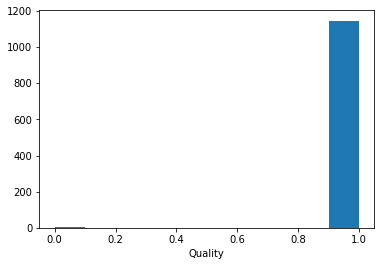

Standard deviation of Quality: 0.058848633264556395
Mean of Clump Quality: 0.996524761077324
Median of Clump Quality: 1.0


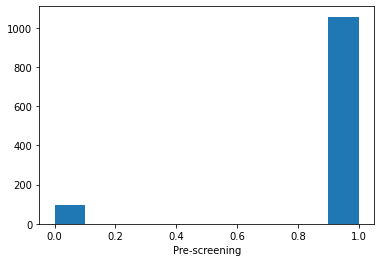

Standard deviation of Pre-screening: 0.27385841912752595
Mean of Clump Pre-screening: 0.9183318853171155
Median of Clump Pre-screening: 1.0


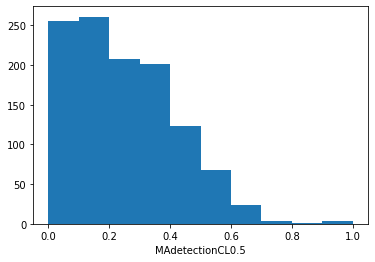

Standard deviation of MAdetectionCL0.5: 0.1707318688646014
Mean of Clump MAdetectionCL0.5: 0.24952215464813204
Median of Clump MAdetectionCL0.5: 0.22666666666666666


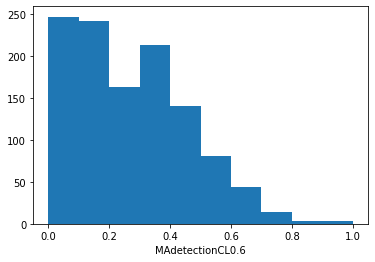

Standard deviation of MAdetectionCL0.6: 0.18393235124878093
Mean of Clump MAdetectionCL0.6: 0.27411941822908725
Median of Clump MAdetectionCL0.6: 0.2595419847328244


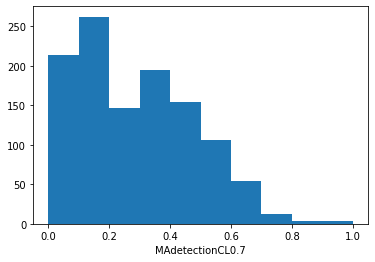

Standard deviation of MAdetectionCL0.7: 0.19155874679848076
Mean of Clump MAdetectionCL0.7: 0.28689703509553255
Median of Clump MAdetectionCL0.7: 0.2605042016806723


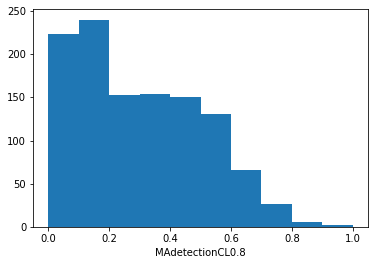

Standard deviation of MAdetectionCL0.8: 0.20293838833684216
Mean of Clump MAdetectionCL0.8: 0.30093397046046916
Median of Clump MAdetectionCL0.8: 0.2692307692307692


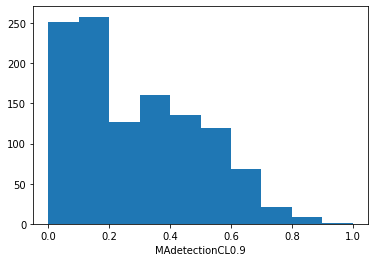

Standard deviation of MAdetectionCL0.9: 0.20313281503526742
Mean of Clump MAdetectionCL0.9: 0.2890330871705763
Median of Clump MAdetectionCL0.9: 0.25


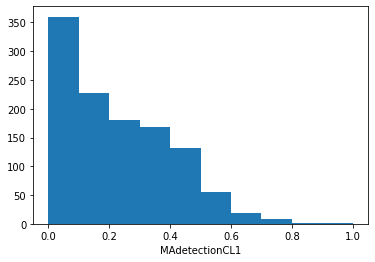

Standard deviation of MAdetectionCL1: 0.17153407722041025
Mean of Clump MAdetectionCL1: 0.22899060105836827
Median of Clump MAdetectionCL1: 0.19318181818181818


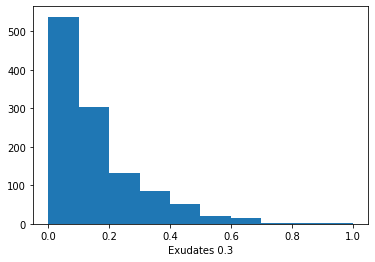

Standard deviation of Exudates 0.3: 0.14484972744550728
Mean of Clump Exudates 0.3: 0.15795095651208393
Median of Clump Exudates 0.3: 0.10877341623030079


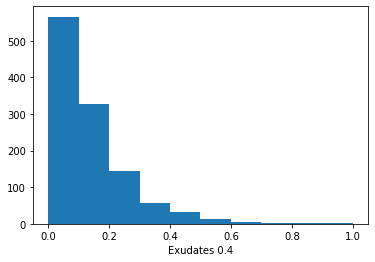

Standard deviation of Exudates 0.4: 0.1291995747350125
Mean of Clump Exudates 0.4: 0.13814285501876244
Median of Clump Exudates 0.4: 0.10194384327251631


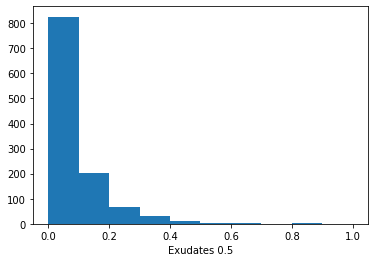

Standard deviation of Exudates 0.5: 0.10900870468612439
Mean of Clump Exudates 0.5: 0.08206470031883731
Median of Clump Exudates 0.5: 0.041703291819526284


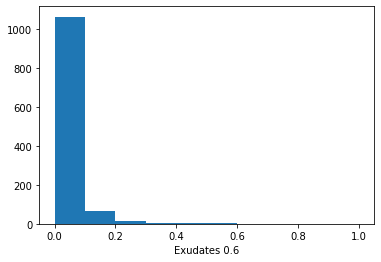

Standard deviation of Exudates 0.6: 0.06561441337508415
Mean of Clump Exudates 0.6: 0.030727928531621797
Median of Clump Exudates 0.6: 0.008112104180226119


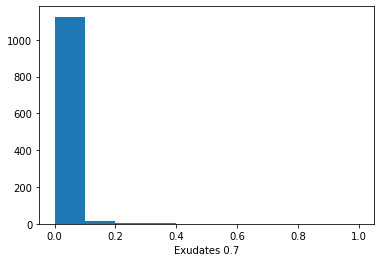

Standard deviation of Exudates 0.7: 0.04828621155705265
Mean of Clump Exudates 0.7: 0.010904378341228616
Median of Clump Exudates 0.7: 0.0004326451200788562


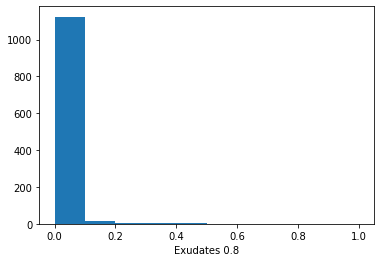

Standard deviation of Exudates 0.8: 0.05257411748688494
Mean of Clump Exudates 0.8: 0.01056241972139362
Median of Clump Exudates 0.8: 7.731879899127328e-05


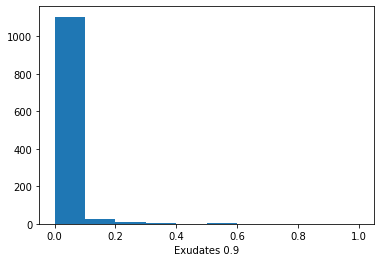

Standard deviation of Exudates 0.9: 0.06711982545076545
Mean of Clump Exudates 0.9: 0.014428602227587468
Median of Clump Exudates 0.9: 0.0


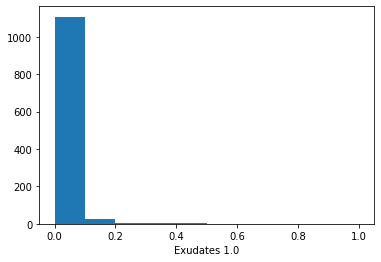

Standard deviation of Exudates 1.0: 0.05795124371077816
Mean of Clump Exudates 1.0: 0.012059642090937538
Median of Clump Exudates 1.0: 0.0


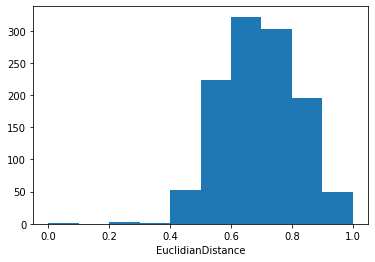

Standard deviation of EuclidianDistance: 0.12493891529200545
Mean of Clump EuclidianDistance: 0.6925675380007731
Median of Clump EuclidianDistance: 0.6929941413646388


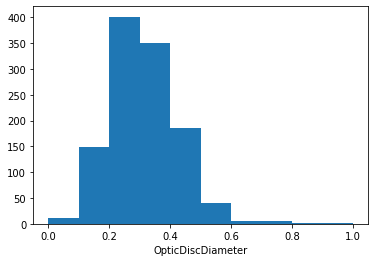

Standard deviation of OpticDiscDiameter: 0.11120787918464717
Mean of Clump OpticDiscDiameter: 0.3132516691795461
Median of Clump OpticDiscDiameter: 0.30204038612959017


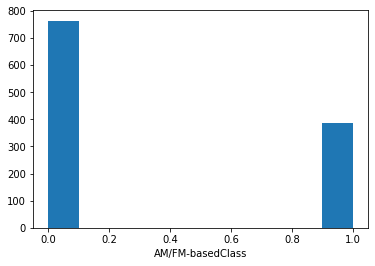

Standard deviation of AM/FM-basedClass: 0.4724184367311908
Mean of Clump AM/FM-basedClass: 0.3362293657688966
Median of Clump AM/FM-basedClass: 0.0


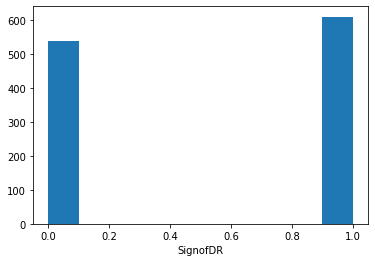

Standard deviation of SignofDR: 0.49904781840400875
Mean of Clump SignofDR: 0.5308427454387489
Median of Clump SignofDR: 1.0


In [24]:
#class and feature distribution for messidor dataset
messidor_np = df_messidor.to_numpy().astype(np.float)
messidor_x = messidor_np[:,1:18]
for i in range(messidor_x.shape[1]):
  messidor_x[:,i] = (messidor_x[:,i] - messidor_x[:,i].min())/(messidor_x[:,i].max() - messidor_x[:,i].min())   # rescaling the data st all data distributing in [0,1]
messidor_y = messidor_np[:,19].astype(int)


plt.hist(messidor_y)
plt.xlabel('Class')
plt.show()
sign = np.count_nonzero(messidor_y==1)
no_sign = np.count_nonzero(messidor_y==0)
print(f'{messidor_y.shape[0]} valid instances in messidor dataset, {sign} instances are classified as sign, {no_sign} instances are classified as no_sign')

feature_dict = {'Quality': messidor_np[:, 0], 
                'Pre-screening': messidor_np[:, 1], 
                'MAdetectionCL0.5': messidor_np[:, 2],
                'MAdetectionCL0.6': messidor_np[:, 3],
                'MAdetectionCL0.7': messidor_np[:,4],
                'MAdetectionCL0.8': messidor_np[:, 5],
                'MAdetectionCL0.9':messidor_np[:, 6],
                'MAdetectionCL1': messidor_np[:, 7],
                'Exudates 0.3': messidor_np[:, 8],
                'Exudates 0.4': messidor_np[:, 9],
                'Exudates 0.5': messidor_np[:, 10],
                'Exudates 0.6': messidor_np[:, 11],
                'Exudates 0.7': messidor_np[:, 12],
                'Exudates 0.8': messidor_np[:, 13],
                'Exudates 0.9': messidor_np[:, 14],
                'Exudates 1.0': messidor_np[:, 15],
                'EuclidianDistance':messidor_np[:, 16],
                'OpticDiscDiameter': messidor_np[:, 17],
                'AM/FM-basedClass': messidor_np[:, 18],
                'SignofDR': messidor_np[:, 19]}

for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Standard deviation of {name}: {np.std(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

Top Absolute Correlations
SignofDR          SignofDR2           1.000000
MAdetectionCL0.5  MAdetectionCL0.6    0.996177
MAdetectionCL0.6  MAdetectionCL0.7    0.994221
MAdetectionCL0.7  MAdetectionCL0.8    0.991821
MAdetectionCL0.8  MAdetectionCL0.9    0.988294
dtype: float64


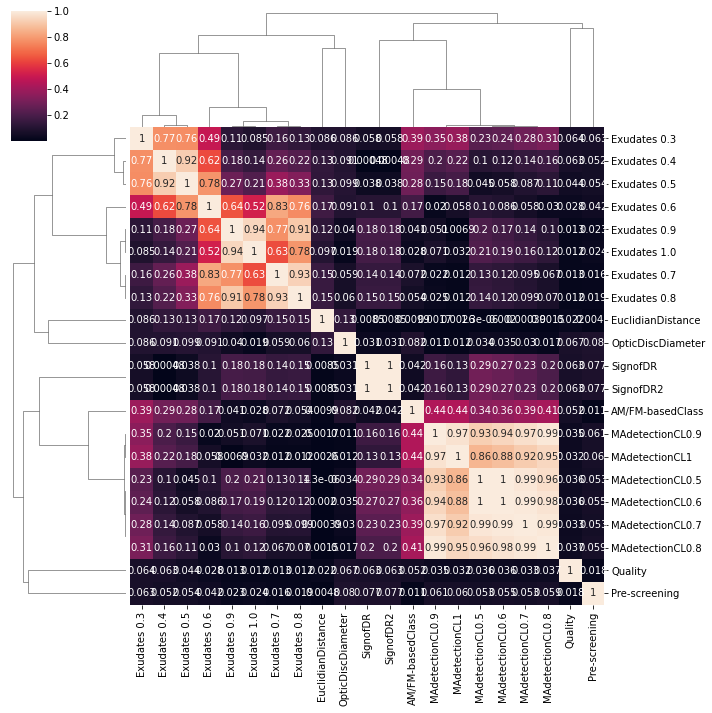

In [25]:
messidor=df_messidor.apply(pd.to_numeric)#convert all data type to be numeric
#take the absolute values
messidor_corr=messidor.corr().abs()
plot_corr = sns.clustermap(data = messidor_corr,
                           metric="correlation",
                           annot=True,
                           )
plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(messidor, 5))

# KNN part

In [57]:
#KNN CLASS
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K, dist_fn):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

In [58]:
#define accuracy evaluation function
def evaluate_acc(y_pred: np.ndarray, y_actual: np.ndarray) -> float:
    # Returns accuracy %.
    num_correct_labels = np.sum(y_pred == y_actual)
    return (num_correct_labels / len(y_pred)) * 100.0

best K = 3, test accuracy = 0.9130434782608695,validation accuracy=0.7777777777777778


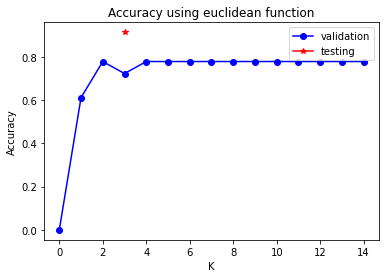

In [59]:
#using euclidean without standardize
model_choices=[]
valid_acc_eu = []
test_acc_eu=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

n_valid = hepa_y_vali.shape[0]
n_test=hepa_y_test.shape[0]

valid_acc_eu.append(0)
test_acc_eu.append(0)
for k in range(1,15):
    
       model = KNN(k,dist_fn=euclidean)
       knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
       y_train_va_prob,_ = knn.fit(hepa_x_train2, hepa_y_train2).predict(hepa_x_vali)
       y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
       accuracy_vali = np.sum(y_train_va_pred == hepa_y_vali)/n_valid
       model_choices.append(k)
       valid_acc_eu.append(accuracy_vali)
    
       y_test_prob,_ = knn.predict(hepa_x_test)
       y_test_pred = np.argmax(y_test_prob,axis=-1)
       accuracy_test = np.sum(y_test_pred == hepa_y_test)/n_test
       test_acc_eu.append(accuracy_test)
    
        

# use the best K to predict test data
best_valid_K = model_choices[valid_acc_eu.index(max(valid_acc_eu))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(hepa_x_train2, hepa_y_train2).predict(hepa_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy= np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]

plt.title("Accuracy using euclidean function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy},validation accuracy={max(valid_acc_eu)}')

plt.plot(x_axis, valid_acc_eu, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')



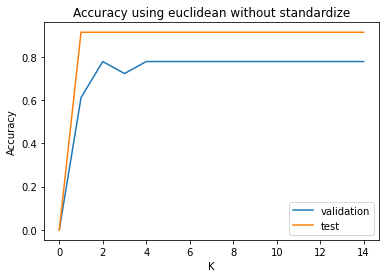

In [60]:
plt.title("Accuracy using euclidean without standardize")
plt.plot(x_axis,valid_acc_eu,label='validation')
plt.plot(x_axis,test_acc_eu,label='test')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()



best K = 3, test accuracy = 0.8695652173913043,validation accuracy=0.7777777777777778


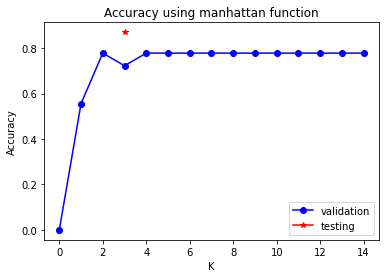

In [61]:
#using manhattan without standardize
model_choices=[]
valid_acc_ma = []
test_acc_ma=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

n_valid = hepa_y_vali.shape[0]
n_test=hepa_y_test.shape[0]

valid_acc_ma.append(0)
test_acc_ma.append(0)
for k in range(1,15):
    model = KNN(k,dist_fn=manhattan)
    knn = KNN(K=k,dist_fn=manhattan) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(hepa_x_train2, hepa_y_train2).predict(hepa_x_vali)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == hepa_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_ma.append(accuracy_vali)
    
    y_test_prob,_ = knn.predict(hepa_x_test)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == hepa_y_test)/n_test
    test_acc_ma.append(accuracy_test)
    

# use the best K to predict test data
best_valid_K = model_choices[valid_acc_ma.index(max(valid_acc_ma))]
knn = KNN(K=best_valid_K,dist_fn=manhattan)
y_test_prob,_ = knn.fit(hepa_x_train2, hepa_y_train2).predict(hepa_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_ma= np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]

plt.title("Accuracy using manhattan function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_ma},validation accuracy={max(valid_acc_ma)}')

plt.plot(x_axis, valid_acc_ma, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy_ma, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('Hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

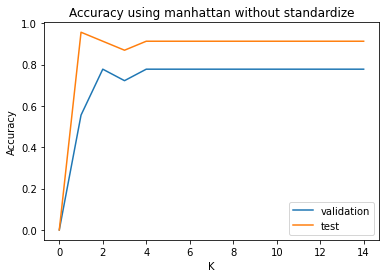

In [62]:
plt.title("Accuracy using manhattan without standardize")
plt.plot(x_axis,valid_acc_ma,label='validation')
plt.plot(x_axis,test_acc_ma,label='test')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best K = 7, test accuracy = 0.9130434782608695,validation accuracy=0.8888888888888888


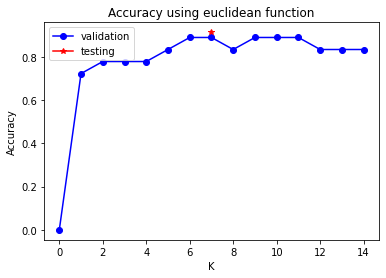

In [63]:
#using euclidean
test_acc_eu_std=[]
valid_acc_std=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

valid_acc_std.append(0)
test_acc_eu_std.append(0)
train_acc_eu_std=[]
n_train=hepa_x_train_mod.shape[0]
train_acc_eu_std.append(0)

for k in range(1,15):
    model = KNN(k,dist_fn=euclidean)
    knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(hepa_x_train_mod, hepa_y_train2).predict(hepa_x_vali_mod)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == hepa_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_std.append(accuracy_vali)

    y_test_prob,_ = knn.predict(hepa_x_test_mod)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == hepa_y_test)/n_test
    test_acc_eu_std.append(accuracy_test)
    
    y_train_prob,_=knn.predict(hepa_x_train_mod)
    y_train_pred = np.argmax(y_train_prob,axis=-1)
    accuracy_test = np.sum(y_train_pred == hepa_y_train2)/n_train
    train_acc_eu_std.append(accuracy_test)
# use the best K to predict test data
best_valid_K = model_choices[valid_acc_std.index(max(valid_acc_std))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(hepa_x_train_mod, hepa_y_train2).predict(hepa_x_test_mod)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_std = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]

plt.title("Accuracy using euclidean function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_std},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_std, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy_std, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

best K = 4, test accuracy = 0.9565217391304348,validation accuracy=0.8888888888888888


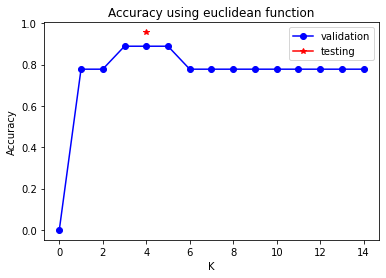

In [33]:
#feature selection by using manhattan/euclidean for hepatitis
hepa_x_train2_fs = SelectKBest(score_func=f_regression,k=1).fit_transform(hepa_x_train2,hepa_y_train2)
hepa_x_test_fs = SelectKBest(score_func=f_regression,k=1).fit_transform(hepa_x_test,hepa_y_test)
hepa_x_vali_fs = SelectKBest(score_func=f_regression,k=1).fit_transform(hepa_x_vali,hepa_y_vali)


test_acc_eu_std=[]
valid_acc_std=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

valid_acc_std.append(0)
test_acc_eu_std.append(0)
train_acc_eu_std=[]
n_train=hepa_x_train_mod.shape[0]
train_acc_eu_std.append(0)

for k in range(1,15):
    model = KNN(k,dist_fn=euclidean)
    knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(hepa_x_train2_fs, hepa_y_train2).predict(hepa_x_vali_fs)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == hepa_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_std.append(accuracy_vali)

    y_test_prob,_ = knn.predict(hepa_x_test_fs)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == hepa_y_test)/n_test
    test_acc_eu_std.append(accuracy_test)
    
    y_train_prob,_=knn.predict(hepa_x_train2_fs)
    y_train_pred = np.argmax(y_train_prob,axis=-1)
    accuracy_test = np.sum(y_train_pred == hepa_y_train2)/n_train
    train_acc_eu_std.append(accuracy_test)
# use the best K to predict test data
best_valid_K = model_choices[valid_acc_std.index(max(valid_acc_std))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(hepa_x_train2_fs, hepa_y_train2).predict(hepa_x_test_fs)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_std = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]

plt.title("Accuracy using euclidean function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_std},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_std, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy_std, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

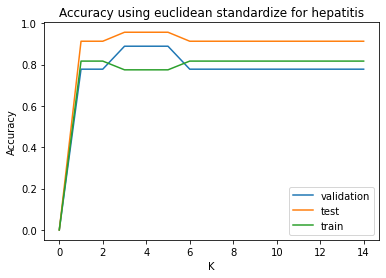

In [34]:

plt.title("Accuracy using euclidean standardize for hepatitis")
plt.plot(x_axis,valid_acc_std,label='validation')
plt.plot(x_axis,test_acc_eu_std,label='test')
plt.plot(x_axis,train_acc_eu_std,label='train')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best K = 7, test accuracy = 0.9130434782608695,validation accuracy=0.8888888888888888


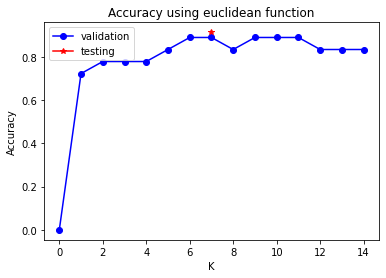

In [35]:
#using euclidean
test_acc_eu_std=[]
valid_acc_std=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

valid_acc_std.append(0)
test_acc_eu_std.append(0)
train_acc_eu_std=[]
n_train=hepa_x_train_mod.shape[0]
train_acc_eu_std.append(0)

for k in range(1,15):
    model = KNN(k,dist_fn=euclidean)
    knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(hepa_x_train_mod, hepa_y_train2).predict(hepa_x_vali_mod)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == hepa_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_std.append(accuracy_vali)

    y_test_prob,_ = knn.predict(hepa_x_test_mod)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == hepa_y_test)/n_test
    test_acc_eu_std.append(accuracy_test)
    
    y_train_prob,_=knn.predict(hepa_x_train_mod)
    y_train_pred = np.argmax(y_train_prob,axis=-1)
    accuracy_test = np.sum(y_train_pred == hepa_y_train2)/n_train
    train_acc_eu_std.append(accuracy_test)
# use the best K to predict test data
best_valid_K = model_choices[valid_acc_std.index(max(valid_acc_std))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(hepa_x_train_mod, hepa_y_train2).predict(hepa_x_test_mod)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_std = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]

plt.title("Accuracy using euclidean function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_std},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_std, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy_std, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

best K = 10, test accuracy = 0.9565217391304348,validation accuracy=0.8888888888888888


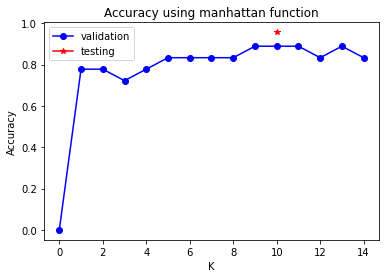

In [36]:
#using manhattan
model_choices=[]

test_acc_std=[]
valid_acc_std=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

n_valid = hepa_y_vali.shape[0]

valid_acc_std.append(0)
test_acc_std.append(0)

train_acc_ma_std=[]
n_train=hepa_x_train_mod.shape[0]
train_acc_ma_std.append(0)
for k in range(1,15):
    model = KNN(k,dist_fn=manhattan)
    knn = KNN(K=k,dist_fn=manhattan) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(hepa_x_train_mod, hepa_y_train2).predict(hepa_x_vali_mod)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == hepa_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_std.append(accuracy_vali)
    
    y_test_prob,_ = knn.predict(hepa_x_test_mod)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == hepa_y_test)/n_test
    test_acc_std.append(accuracy_test)

    y_train_prob,_=knn.predict(hepa_x_train_mod)
    y_train_pred = np.argmax(y_train_prob,axis=-1)
    accuracy_test = np.sum(y_train_pred == hepa_y_train2)/n_train
    train_acc_ma_std.append(accuracy_test)
# use the best K to predict test data
best_valid_K = model_choices[valid_acc_std.index(max(valid_acc_std))]
knn = KNN(K=best_valid_K,dist_fn=manhattan)
y_test_prob,_ = knn.fit(hepa_x_train_mod, hepa_y_train2).predict(hepa_x_test_mod)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_std = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]

plt.title("Accuracy using manhattan function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_std},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_std, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy_std, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

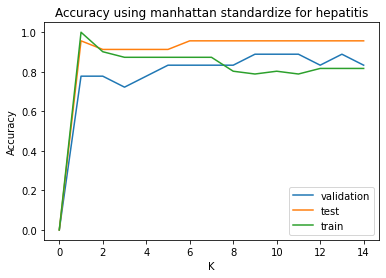

In [37]:
plt.title("Accuracy using manhattan standardize for hepatitis")
plt.plot(x_axis,valid_acc_std,label='validation')
plt.plot(x_axis,test_acc_std,label='test')
plt.plot(x_axis,train_acc_ma_std,label='train')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

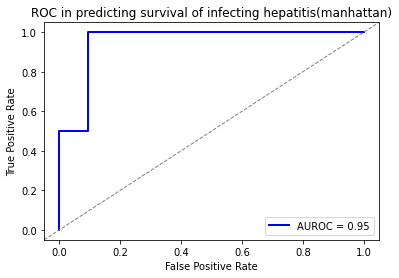

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
#change distance function here
knn = KNN(10,manhattan) # create a KNN object (OOP)
knn.fit(hepa_x_train_mod, hepa_y_train2)
# column 0 is healthy
# column 1 is cancer
y_test_prob,_= knn.predict(hepa_x_test_mod)
#print(y_test_prob)
y_test_prob=y_test_prob[:,1]
#print(y_test_prob)
#y_test_pred = np.argmax(y_test_prob, axis=-1)
fpr, tpr, thresholds = roc_curve(hepa_y_test, y_test_prob)
roc_auc = roc_auc_score(hepa_y_test, y_test_prob)

plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting survival of infecting hepatitis(manhattan)')
plt.legend(loc="best")
#plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

In [39]:
#compare result with build in function
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # n_neighbors=5 (default)
fit = knn.fit(hepa_x_train_mod, hepa_y_train2)
y_train_pred = fit.predict(hepa_x_train_mod)
y_test_pred = fit.predict(hepa_x_test_mod)

acc_train = np.sum(y_train_pred==hepa_y_train2)/len(hepa_y_train2)
acc_test = np.sum(y_test_pred==hepa_y_test)/len(hepa_y_test)

print("training accuracy",acc_train)
print("testing accuracy",acc_test)

training accuracy 0.8309859154929577
testing accuracy 0.9130434782608695


knns shape: (23, 5)
y_prob shape: (23, 2)
accuracy is 91.3.


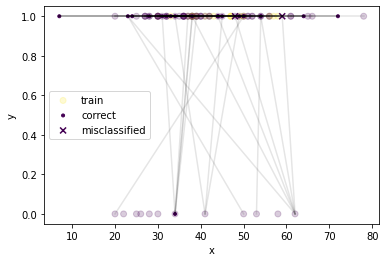

In [40]:
import matplotlib.pyplot as plt
myK = 5

model = KNN(K=myK,dist_fn=euclidean)

y_prob, knns = model.fit(hepa_x_train,hepa_y_train).predict(hepa_x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == hepa_y_test)/hepa_y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = hepa_y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(hepa_x_train[:,0], hepa_x_train[:,1], c=hepa_y_train, marker='o', alpha=.2, label='train')
plt.scatter(hepa_x_test[correct,0], hepa_x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(hepa_x_test[incorrect,0], hepa_x_test[incorrect,1], marker='x', c=hepa_y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(hepa_x_test.shape[0]):
    for k in range(model.K):
        hor = hepa_x_test[i,0], hepa_x_train[knns[i,k],0]
        ver = hepa_x_test[i,1], hepa_x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.savefig('iris_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
plt.show()


1
accuracy: 82.6.


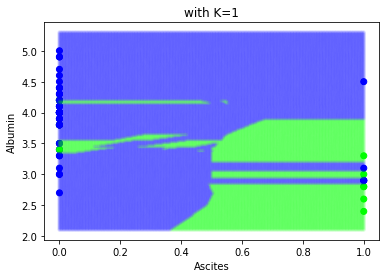

4
accuracy: 82.6.


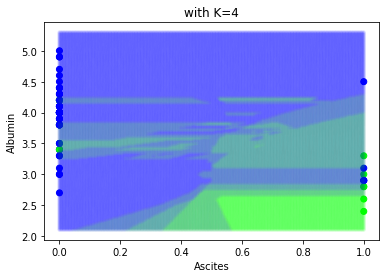

7
accuracy: 95.7.


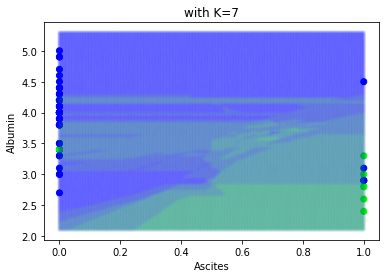

10
accuracy: 95.7.


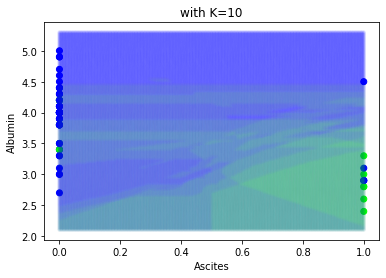

13
accuracy: 91.3.


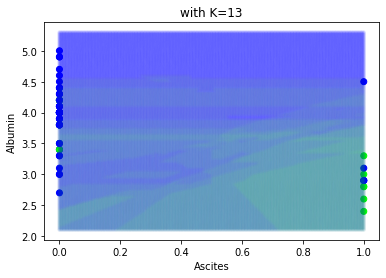

In [65]:
     
# we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(hepatitis_x[:,11]), np.max(hepatitis_x[:,11]), 200)
x1v = np.linspace(np.min(hepatitis_x[:,16]), np.max(hepatitis_x[:,16]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1,16,3):
    print(k)
    model = KNN(K=k,dist_fn=euclidean)
    C = int(np.max(hepatitis_y))+2


    y_train_prob = np.zeros((hepatitis_y_train2.shape[0], C))
    y_train_prob[np.arange(hepatitis_y_train2.shape[0]), hepatitis_y_train2] = 1
    
    y_prob, knns = model.fit(hepa_x_train2[:,[11,16]], hepatitis_y_train2).predict(hepa_x_test[:,[11,16]])
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = hepa_y_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == hepatitis_y_test)/hepatitis_y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(hepa_x_train2[:,[11,16]], hepatitis_y_train2).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    #plot decision by using top features Ascites and Albumin
    plt.scatter(hepa_x_train2[:,11], hepa_x_train2[:,16], c=y_train_prob, marker='o', alpha=1)

    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.08)
    plt.xlabel('Ascites')
    plt.ylabel('Albumin')
    plt.title(f"with K={k}")
    plt.show()
#plt.savefig('iris_KNN'+str(k)+'.png',dpi=300,bbox_inches='tight') 
   

using euclidean to draw boundaries


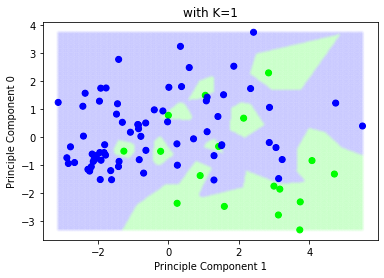

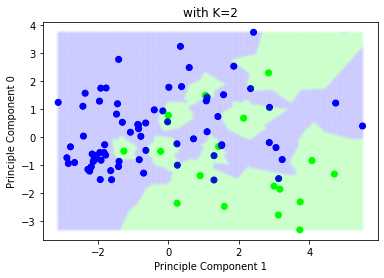

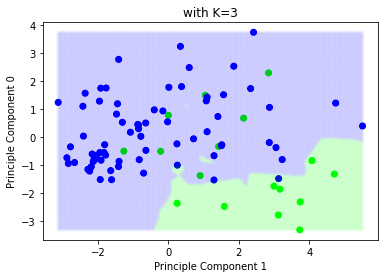

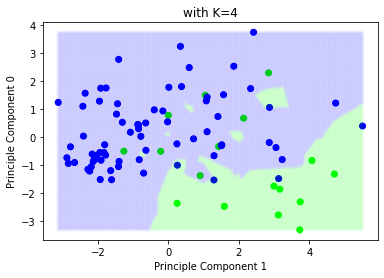

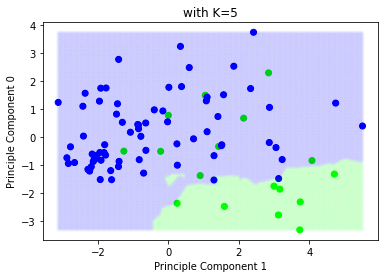

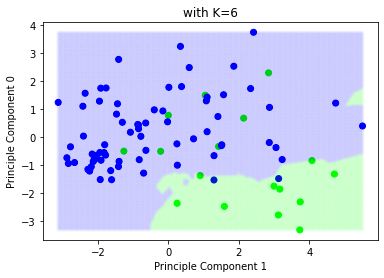

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_hepatitis_x = StandardScaler().fit_transform(hepatitis_x)

h_pca=PCA(n_components=2,copy=True)
h_principal_components = h_pca.fit_transform(std_hepatitis_x)

std_hepatitis_x_train = h_principal_components[hepa_inds[:hepa_partition]]

#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(h_principal_components[:,0]), np.max(h_principal_components[:,0]), 250)
x1v = np.linspace(np.min(h_principal_components[:,1]), np.max(h_principal_components[:,1]), 250)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

C = int(np.max(hepatitis_y))+2

print("using euclidean to draw boundaries")
for k in range(1,7):
  model = KNN(k, euclidean)   #using euclidean to draw boundaries

  y_train_prob = np.zeros((hepatitis_y_train.shape[0], C))
  y_train_prob[np.arange(hepatitis_y_train.shape[0]), hepatitis_y_train] = 1
  

  #to get class probability of all the points in the 2D grid
  y_prob_all, knns = model.fit(std_hepatitis_x_train, hepatitis_y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(std_hepatitis_x_train[:,0], std_hepatitis_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.title(f"with K={k}")
  plt.ylabel('Principle Component 0')
  plt.xlabel('Principle Component 1')
  plt.show()


In [67]:
#for second dataset

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best K = 8, test accuracy = 0.6147186147186147,validation accuracy=0.6956521739130435


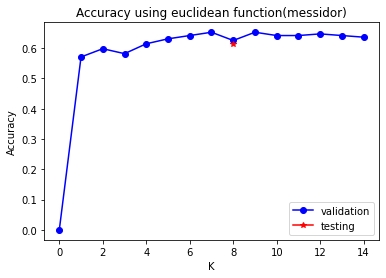

In [104]:
#using euclidean without standardize
model_choices=[]
valid_acc_eu = []
test_acc_eu=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

n_valid = mess_y_vali.shape[0]
n_test=mess_y_test.shape[0]

valid_acc_eu.append(0)
test_acc_eu.append(0)

train_acc_eu=[]
n_train=mess_x_train2.shape[0]
train_acc_eu.append(0)

for k in range(1,15):
    model = KNN(k,dist_fn=euclidean)
    knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(mess_x_train2, mess_y_train2).predict(mess_x_vali)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == mess_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_eu.append(accuracy_vali)
    
    y_test_prob,_ = knn.predict(mess_x_test)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == mess_y_test)/n_test
    test_acc_eu.append(accuracy_test)
    
    y_train_prob,_ = knn.predict(mess_x_train2)
    y_train_pred = np.argmax(y_train_prob, axis=-1)
    accuracy_train=np.sum(y_train_pred == mess_y_train2)/n_train
    train_acc_eu.append(accuracy_train)
    
    

# use the best K to predict test data
print(model_choices)
best_valid_K = model_choices[valid_acc_eu.index(max(valid_acc_eu))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(mess_x_train2, mess_y_train2).predict(mess_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == mess_y_test)/mess_y_test.shape[0]

plt.title("Accuracy using euclidean function(messidor)")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_eu, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.savefig('Messidor_KNN_chooseK.png',dpi=300,bbox_inches='tight')

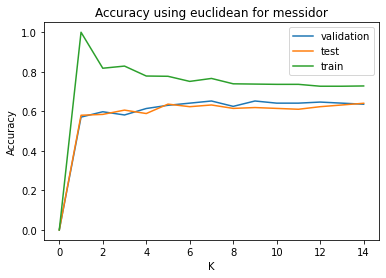

In [105]:
plt.title("Accuracy using euclidean for messidor")
plt.plot(x_axis,valid_acc_eu,label='validation')
plt.plot(x_axis,test_acc_eu,label='test')
plt.plot(x_axis,train_acc_eu,label='train')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best K = 8, test accuracy = 0.6147186147186147,validation accuracy=0.6956521739130435


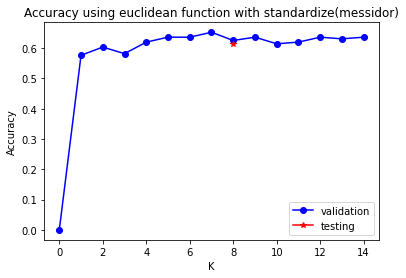

In [106]:
#using euclidean with part standardize
model_choices=[]
valid_acc_eu = []
test_acc_eu=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

n_valid = mess_y_vali.shape[0]
n_test=mess_y_test.shape[0]

valid_acc_eu.append(0)
test_acc_eu.append(0)

train_acc_eu=[]
n_train=mess_x_train_mod.shape[0]
train_acc_eu.append(0)

for k in range(1,15):
    model = KNN(k,dist_fn=euclidean)
    knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(mess_x_train_mod, mess_y_train2).predict(mess_x_vali_mod)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == mess_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_eu.append(accuracy_vali)
    
    y_test_prob,_ = knn.predict(mess_x_test_mod)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == mess_y_test)/n_test
    test_acc_eu.append(accuracy_test)
    
    y_train_prob,_ = knn.predict(mess_x_train_mod)
    y_train_pred = np.argmax(y_train_prob, axis=-1)
    accuracy_train=np.sum(y_train_pred == mess_y_train2)/n_train
    train_acc_eu.append(accuracy_train)
print(model_choices)
best_valid_K = model_choices[valid_acc_eu.index(max(valid_acc_eu))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(mess_x_train_mod, mess_y_train2).predict(mess_x_test_mod)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == mess_y_test)/mess_y_test.shape[0]

plt.title("Accuracy using euclidean function with standardize(messidor)")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_eu, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

best K = 7, test accuracy = 0.6320346320346321,validation accuracy=0.6413043478260869


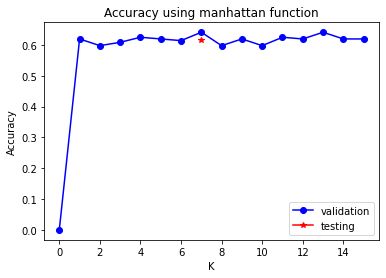

In [107]:
#using manhattan
model_choices=[]
valid_acc_ma = []
test_acc_ma=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

n_valid = mess_y_vali.shape[0]

valid_acc_ma.append(0)
test_acc_ma.append(0)
model_choices.append(0)

train_acc_ma=[]
train_acc_ma.append(0)
for k in range(1,16):
    model = KNN(k,dist_fn=manhattan)
    knn = KNN(K=k,dist_fn=manhattan) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(mess_x_train2, mess_y_train2).predict(mess_x_vali)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == mess_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_ma.append(accuracy_vali)
    
    y_test_prob,_ = knn.predict(mess_x_test)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == mess_y_test)/n_test
    test_acc_ma.append(accuracy_test)
    
    y_train_prob,_ = knn.predict(mess_x_train2)
    y_train_pred = np.argmax(y_train_prob, axis=-1)
    accuracy_train=np.sum(y_train_pred == mess_y_train2)/n_train
    train_acc_ma.append(accuracy_train)
    

# use the best K to predict test data

best_valid_K = model_choices[valid_acc_ma.index(max(valid_acc_ma))]
knn = KNN(K=best_valid_K,dist_fn=manhattan)
y_test_prob,_ = knn.fit(mess_x_train2, mess_y_train2).predict(mess_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_ma= np.sum(y_test_pred == mess_y_test)/mess_y_test.shape[0]

plt.title("Accuracy using manhattan function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_ma},validation accuracy={max(valid_acc_ma)}')

plt.plot(x_axis, valid_acc_ma, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

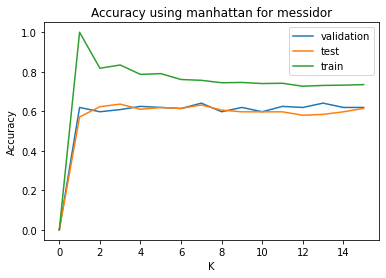

In [108]:
plt.title("Accuracy using manhattan for messidor")
plt.plot(x_axis,valid_acc_ma,label='validation')
plt.plot(x_axis,test_acc_ma,label='test')
plt.plot(x_axis,train_acc_ma,label='train')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

/Users/catherine/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/catherine/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


best K = 7, test accuracy = 0.6363636363636364,validation accuracy=0.6956521739130435


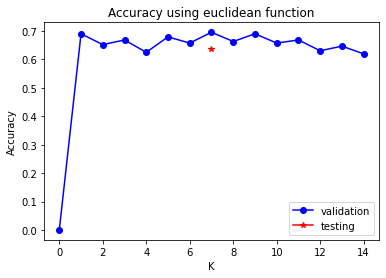

In [109]:
#feature selection by using manhattan/euclidean for hepatitis
mess_x_train2_fs = SelectKBest(score_func=f_regression,k=2).fit_transform(mess_x_train2,mess_y_train2)
mess_x_test_fs = SelectKBest(score_func=f_regression,k=2).fit_transform(mess_x_test,mess_y_test)
mess_x_vali_fs = SelectKBest(score_func=f_regression,k=2).fit_transform(mess_x_vali,mess_y_vali)


test_acc_eu_std=[]
valid_acc_std=[]
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

valid_acc_std.append(0)
test_acc_eu_std.append(0)
train_acc_eu_std=[]
n_train=hepa_x_train_mod.shape[0]
train_acc_eu_std.append(0)

for k in range(1,15):
    model = KNN(k,dist_fn=euclidean)
    knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
    y_train_va_prob,_ = knn.fit(mess_x_train2_fs, mess_y_train2).predict(mess_x_vali_fs)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy_vali = np.sum(y_train_va_pred == mess_y_vali)/n_valid
    model_choices.append(k)
    valid_acc_std.append(accuracy_vali)

    y_test_prob,_ = knn.predict(mess_x_test_fs)
    y_test_pred = np.argmax(y_test_prob,axis=-1)
    accuracy_test = np.sum(y_test_pred == mess_y_test)/n_test
    test_acc_eu_std.append(accuracy_test)
    
    y_train_prob,_=knn.predict(mess_x_train2_fs)
    y_train_pred = np.argmax(y_train_prob,axis=-1)
    accuracy_test = np.sum(y_train_pred == mess_y_train2)/n_train
    train_acc_eu_std.append(accuracy_test)
# use the best K to predict test data
best_valid_K = model_choices[valid_acc_std.index(max(valid_acc_std))]
knn = KNN(K=best_valid_K,dist_fn=euclidean)
y_test_prob,_ = knn.fit(mess_x_train2_fs, mess_y_train2).predict(mess_x_test_fs)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_std = np.sum(y_test_pred == mess_y_test)/mess_y_test.shape[0]

plt.title("Accuracy using euclidean function")
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy_std},validation accuracy={max(valid_acc_std)}')

plt.plot(x_axis, valid_acc_std, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy_std, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

1
accuracy: 61.5.


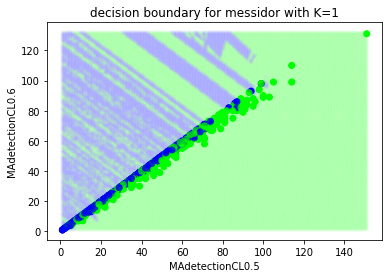

4
accuracy: 65.8.


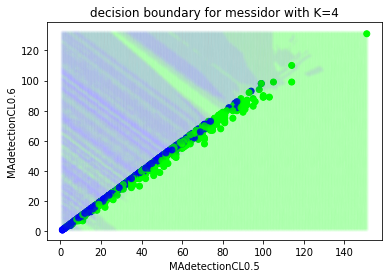

7
accuracy: 63.6.


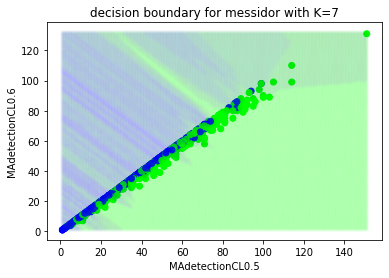

10
accuracy: 66.2.


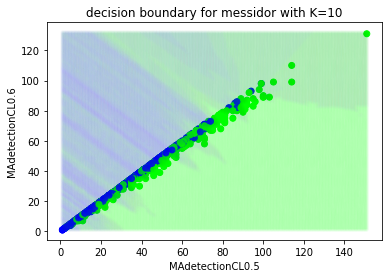

13
accuracy: 65.8.


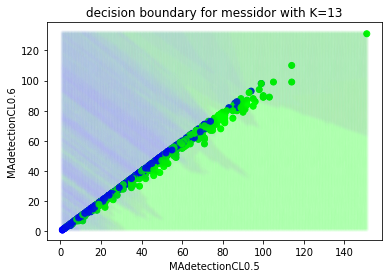

16
accuracy: 66.2.


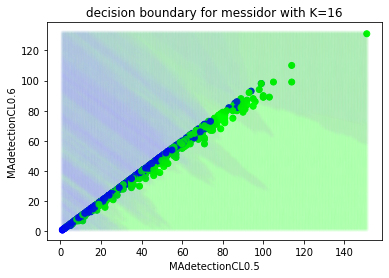

19
accuracy: 64.1.


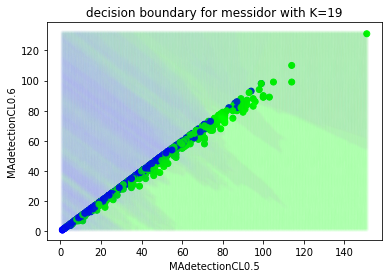

In [120]:
# we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(messidor_x[:,2]), np.max(messidor_x[:,2]), 200)
x1v = np.linspace(np.min(messidor_x[:,3]), np.max(messidor_x[:,3]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1,20,3):
    print(k)
    model = KNN(K=k,dist_fn=euclidean)
    C = int(np.max(mess_y))+2


    y_train_prob = np.zeros((messidor_y_train2.shape[0], C))
    y_train_prob[np.arange(messidor_y_train2.shape[0]), messidor_y_train2] = 1
    
    y_prob, knns = model.fit(mess_x_train2[:,[2,3]], messidor_y_train2).predict(mess_x_test[:,[2,3]])
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = messidor_y_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == messidor_y_test)/messidor_y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(mess_x_train2[:,[2,3]], messidor_y_train2).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    #plot decision by using top features Ascites and Albumin
    plt.scatter(mess_x_train2[:,2], mess_x_train2[:,3], c=y_train_prob, marker='o', alpha=1)

    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.03)
    plt.ylabel('MAdetectionCL0.6')
    plt.xlabel('MAdetectionCL0.5')
    plt.title(f"decision boundary for messidor with K={k}")
    plt.show()
#plt.savefig('iris_KNN'+str(k)+'.png',dpi=300,bbox_inches='tight') 

# decision tree part

node in tree

In [76]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import pandas as pd


class Node:
    #rewind everytime before use predict
    node_num = 0
    def __init__(self, data_indices, parent):
        #the id of node
        self.id = Node.node_num
        Node.node_num = Node.node_num+1
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        self.depth = 0                                  #set depth = 0
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built
    def __str__(self):
      return self.id
    def get_id(self):
      return self.id
      

greedy test

In [77]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <=test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [78]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    #counts = np.bincount(labels) 
    #class_probs = counts / np.sum(counts)
    class_probs = np.bincount(labels) / len(labels)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

decision tree building

In [80]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass
    

In [81]:
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels)+1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [82]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

In [83]:
#decision tree depict
def depict_tree(Dtree):
  """
  input an fitted DecisionTree object,output a description of the tree 
  """
  root = Dtree.root
  stack = [root]#start with the root
  print("decipt the decision tree")
  while len(stack)>0:
    #print(stack)
    #pop from the stack
    node_pop = stack.pop(0)

    node_depth = node_pop.depth
    #if the left and right child of node is not None, then it is a split node
    if(node_pop.left!=None and node_pop.right!=None):
      is_split_node = True
    else:
      is_split_node = False
    
    if is_split_node:
      stack.append(node_pop.left)
      stack.append(node_pop.right)
    
    #print this node
    #if it is a leaf node
    if not is_split_node:
      print(
        "{space}node={node} is a leaf node.".format(
         space=node_depth * "\t", node=node_pop.id)
      )
    #if it is a split node
    else:
      print(
          "{space}node={node} is a split node: "
          "go to node {left} if feature{feature} <= {threshold} "
          "else to node {right}.".format(
                space=node_depth * "\t",
                node=node_pop.id,
                left=node_pop.left.get_id(),
                feature=node_pop.split_feature,
                threshold=node_pop.split_value,
                right=node_pop.right.get_id(),)
      )





In [84]:

Node.node_num = 0
tree1 = DecisionTree(max_depth=5)
probs_test = tree1.fit(hepa_x_train2, hepa_y_train2).predict(hepa_x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == hepa_y_test)/hepa_y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
depict_tree(tree1)

accuracy is 91.3.
decipt the decision tree
node=0 is a split node: go to node 1 if feature16 <= 2.8 else to node 2.
	node=1 is a split node: go to node 3 if feature0 <= 54.0 else to node 4.
	node=2 is a split node: go to node 11 if feature14 <= 255.0 else to node 12.
		node=3 is a split node: go to node 5 if feature0 <= 34.0 else to node 6.
		node=4 is a leaf node.
		node=11 is a split node: go to node 13 if feature13 <= 3.85 else to node 14.
		node=12 is a leaf node.
			node=5 is a leaf node.
			node=6 is a split node: go to node 7 if feature0 <= 42.5 else to node 8.
			node=13 is a split node: go to node 15 if feature0 <= 25.0 else to node 16.
			node=14 is a split node: go to node 21 if feature6 <= 0.0 else to node 22.
				node=7 is a leaf node.
				node=8 is a split node: go to node 9 if feature0 <= 48.5 else to node 10.
				node=15 is a split node: go to node 17 if feature0 <= 22.5 else to node 18.
				node=16 is a split node: go to node 19 if feature0 <= 36.0 else to node 20.
			

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def draw_roc(hepa_y_train2,y_train_pred,hepa_y_valid,y_valid_pred,hepa_y_test,y_test_pred):
  #train
  
  fpr1, tpr1, _ = roc_curve(hepa_y_train2, y_train_pred,pos_label=1)
  auc1 = roc_auc_score(hepa_y_train2, y_train_pred)
  #vali
  fpr2, tpr2, _ = roc_curve(hepa_y_vali, y_valid_pred,pos_label=1)
  auc2 = roc_auc_score(hepa_y_vali, y_valid_pred)
  #test
  fpr3, tpr3, _ = roc_curve(hepa_y_test, y_test_pred,pos_label=1)
  auc3 = roc_auc_score(hepa_y_test, y_test_pred)


  #plot

  fig = plt.figure()
  plt.plot(fpr1,tpr1,label="training")
  plt.text(0.4,0,"training:AUC="+str(round(auc1,2)))

  plt.plot(fpr2,tpr2,label="validation")
  plt.text(0.4,0.1,"validation:AUC="+str(round(auc1,2)))


  plt.plot(fpr3,tpr3,label="testing")
  plt.text(0.4,0.2,"testing:AUC="+str(round(auc2,2)))
  
  plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
  plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  
  

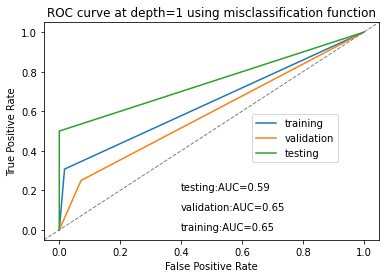

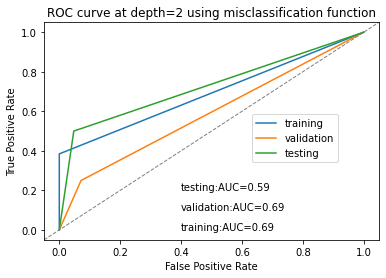

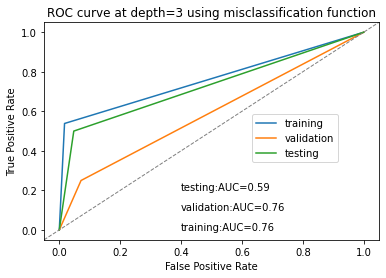

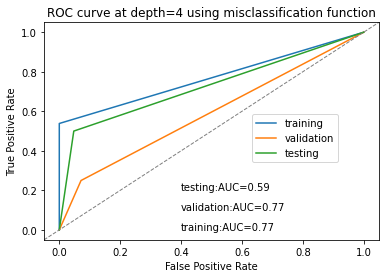

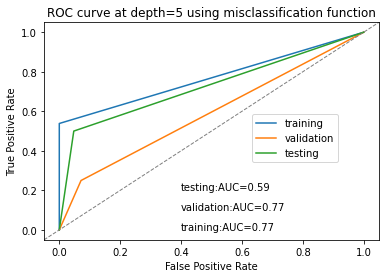

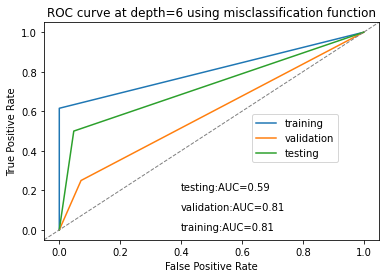

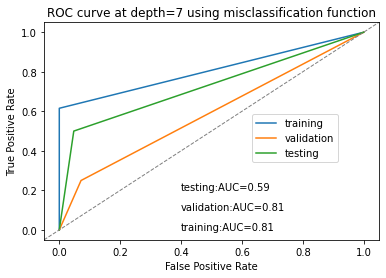

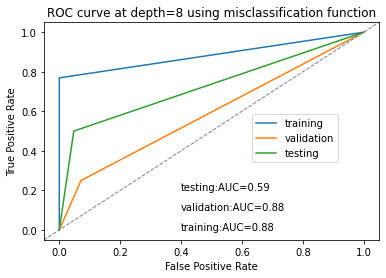

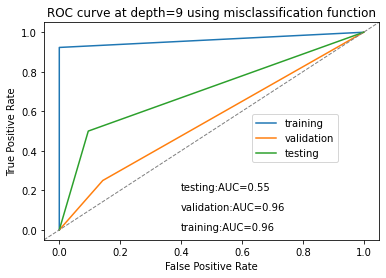

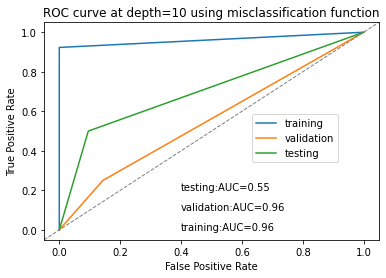

In [86]:
#misclassification
model_choices_mis=[]
train_acc_mis = []
valid_acc_mis = []

n_train = hepa_y_train2.shape[0]
n_valid = hepa_y_vali.shape[0]

for k in range(1, 11):
    #print(k)
    Node.node_num = 0
    dt = DecisionTree(max_depth=k, cost_fn=cost_misclassification, min_leaf_instances=1) # create a decision tree

    dt = dt.fit(hepa_x_train2,hepa_y_train2)
    y_train_tr_prob = dt.predict(hepa_x_train2)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == hepa_y_train2)/n_train

    y_train_va_prob = dt.predict(hepa_x_vali)
    
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == hepa_y_vali)/n_valid

    y_test_prob = dt.predict(hepa_x_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)

    model_choices_mis.append(k)
    train_acc_mis.append(acc_tr)
    valid_acc_mis.append(acc_va)
    draw_roc(hepa_y_train2,y_train_tr_pred,hepa_y_vali,y_train_va_pred,hepa_y_test,y_test_pred)
    plt.title(f"ROC curve at depth={k} using misclassification function")

best depth = 1, test accuracy = 0.9565217391304348
decipt the decision tree
node=0 is a split node: go to node 1 if feature16 <= 2.8 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


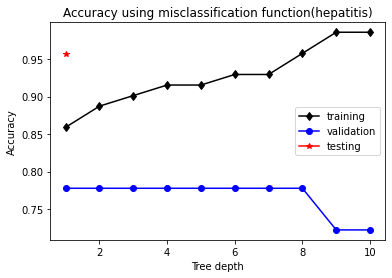

In [87]:
# use the best K to predict test data
best_depth = model_choices_mis[valid_acc_mis.index(max(valid_acc_mis))]
Node.node_num = 0
dt = DecisionTree(max_depth=best_depth, cost_fn=cost_misclassification, min_leaf_instances=1)
dt = dt.fit(hepa_x_train2, hepa_y_train2)
y_test_prob = dt.predict(hepa_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_mis = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {test_accuracy_mis}')

plt.plot(model_choices_mis, train_acc_mis, marker='d', color='black', label='training')
plt.plot(model_choices_mis, valid_acc_mis, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy_mis, marker='*', color='red', label='testing')
plt.title("Accuracy using misclassification function(hepatitis)")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
depict_tree(dt)

Feature 0: 0.634966
Feature 1: 2.021408
Feature 2: 0.007333
Feature 3: 0.025343
Feature 4: 4.160682
Feature 5: 6.270345
Feature 6: 0.110381
Feature 7: 1.442468
Feature 8: 0.658318
Feature 9: 0.235773
Feature 10: 17.566898
Feature 11: 13.234649
Feature 12: 16.237213
Feature 13: 11.136875
Feature 14: 0.511101
Feature 15: 0.077236
Feature 16: 10.835649
Feature 17: 14.913348


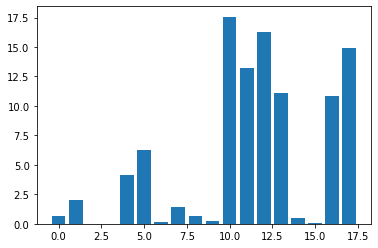

accuracy using misclassifcition is 95.7.


In [89]:
def select_features(X_train, y_train, X_test):    
     # configure to select all features
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
    # transform test input data
     X_test_fs = fs.transform(X_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(hepa_x_train2, hepa_y_train2, hepa_x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# feature selection
def select_features(X_train, y_train, X_test):    
     # configure to select k best features,rank features in the same order if all the features are positively correlated with the target
     fs = SelectKBest(score_func=f_regression, k=10)
     # learn relationship from training data
     fs.fit(hepa_x_train2, hepa_y_train2)
     
     # transform train input data
     X_train_fs = fs.transform(hepa_x_train2)
    # transform test input data
     X_test_fs = fs.transform(hepa_x_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

  # feature selection
X_train_fs, X_test_fs, fs = select_features(hepa_x_train2, hepa_y_train2,hepa_x_test)

# fit the model
model = DecisionTree(max_depth=1, cost_fn=cost_misclassification, min_leaf_instances=1)
model.fit(X_train_fs, hepa_y_train2)
y_prob_fs = model.predict(X_test_fs)

#To get hard predictions by choosing the class with the maximum probability
y_pred_fs = np.argmax(y_prob_fs, axis=-1)


accuracy_fs = (np.sum(y_pred_fs == hepa_y_test)/hepa_y_test.shape[0])*100.0
print(f'accuracy using misclassifcition is {accuracy_fs:.1f}.')

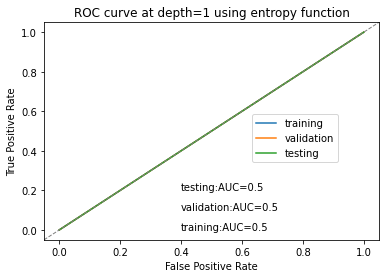

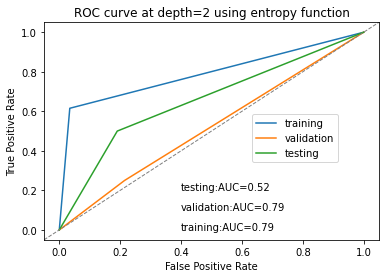

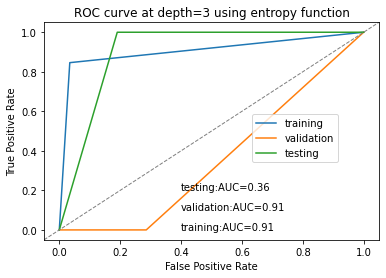

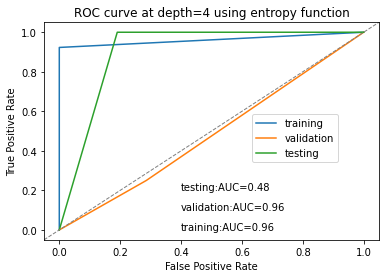

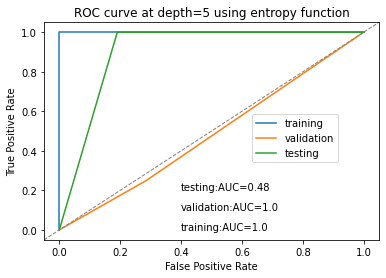

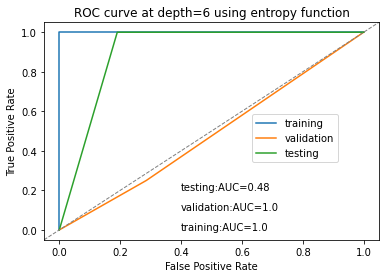

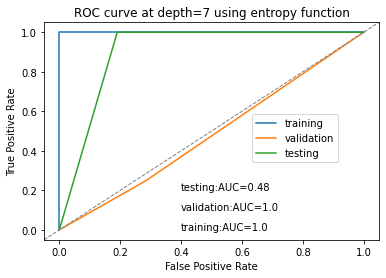

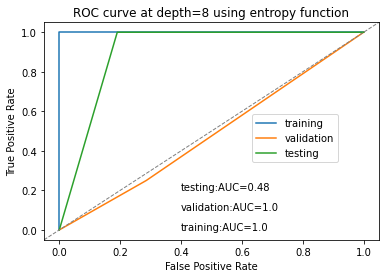

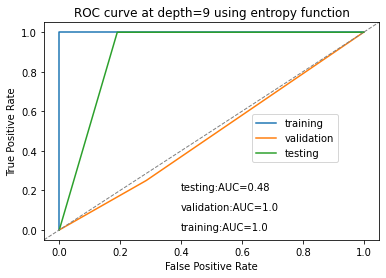

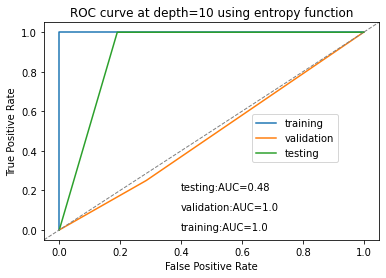

In [90]:
# cost_entropy

model_choices_en=[]
train_acc_en = []
valid_acc_en = []

n_train = hepa_y_train2.shape[0]
n_valid = hepa_y_vali.shape[0]

for k in range(1, 11):
    #print(k)
    Node.node_num = 0
    dt = DecisionTree(max_depth=k,cost_fn=cost_entropy,min_leaf_instances=1) # create a decision tree，这里也要改cost_fn

    dt = dt.fit(hepa_x_train2,hepa_y_train2)
    y_train_tr_prob = dt.predict(hepa_x_train2)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == hepa_y_train2)/n_train

    y_train_va_prob = dt.predict(hepa_x_vali)
    
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == hepa_y_vali)/n_valid

    y_test_prob = dt.predict(hepa_x_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)

    
    model_choices_en.append(k)
    train_acc_en.append(acc_tr)
    valid_acc_en.append(acc_va)
    draw_roc(hepa_y_train2,y_train_tr_pred,hepa_y_vali,y_train_va_pred,hepa_y_test,y_test_pred)
    plt.title(f"ROC curve at depth={k} using entropy function")

best depth = 1, test accuracy = 0.9130434782608695
decipt the decision tree
node=0 is a split node: go to node 1 if feature10 <= 0.0 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


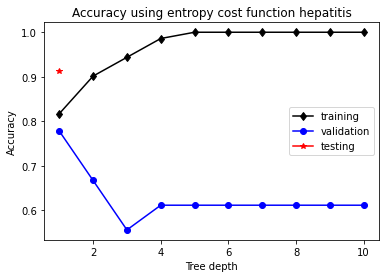

In [91]:
# use the best K to predict test data
best_depth = model_choices_en[valid_acc_en.index(max(valid_acc_en))]
Node.node_num = 0
dt = DecisionTree(max_depth=best_depth,cost_fn=cost_entropy,min_leaf_instances=1)
dt = dt.fit(hepa_x_train2, hepa_y_train2)
y_test_prob = dt.predict(hepa_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_en = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {test_accuracy_en}')

plt.plot(model_choices_en, train_acc_en, marker='d', color='black', label='training')
plt.plot(model_choices_en, valid_acc_en, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy_en, marker='*', color='red', label='testing')
plt.title("Accuracy using entropy cost function hepatitis")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
depict_tree(dt)

In [92]:
def select_features(X_train, y_train, X_test):    
     # configure to select all features
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
    # transform test input data
     X_test_fs = fs.transform(X_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

# feature selection
def select_features(X_train, y_train, X_test):    
     # configure to select k best features,rank features in the same order if all the features are positively correlated with the target
     fs = SelectKBest(score_func=f_regression, k=10)
     # learn relationship from training data
     fs.fit(hepa_x_train2, hepa_y_train2)
     
     # transform train input data
     X_train_fs = fs.transform(hepa_x_train2)
    # transform test input data
     X_test_fs = fs.transform(hepa_x_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

  # feature selection
X_train_fs, X_test_fs, fs = select_features(hepa_x_train2, hepa_y_train2,hepa_x_test)

# fit the model
model = DecisionTree(max_depth=1, cost_fn=cost_entropy, min_leaf_instances=1)
model.fit(X_train_fs, hepa_y_train2)
y_prob_fs = model.predict(X_test_fs)

#To get hard predictions by choosing the class with the maximum probability
y_pred_fs = np.argmax(y_prob_fs, axis=-1)


accuracy_fs = (np.sum(y_pred_fs == hepa_y_test)/hepa_y_test.shape[0])*100.0
print(f'accuracy using entropy is {accuracy_fs:.1f}.')

accuracy using entropy is 91.3.


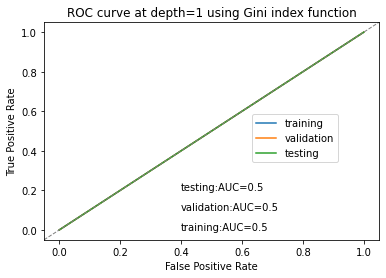

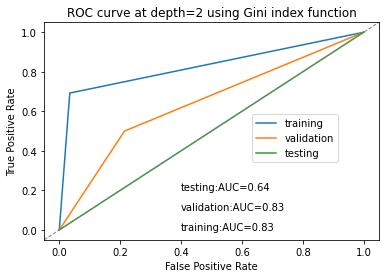

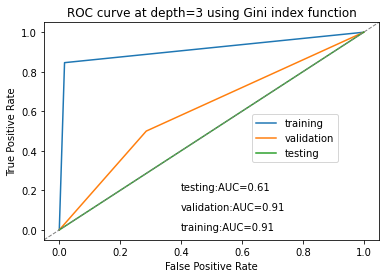

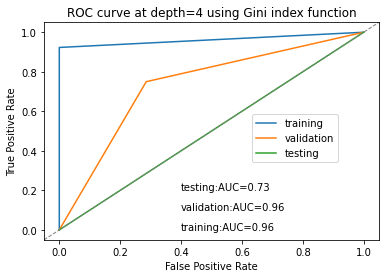

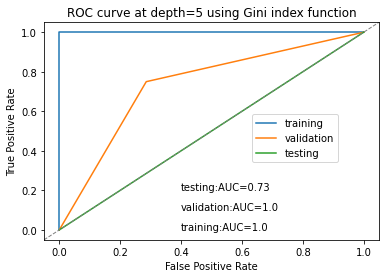

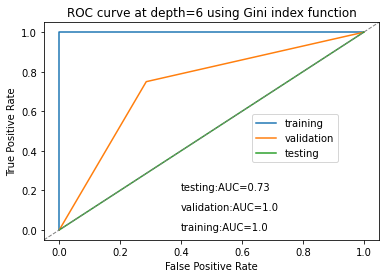

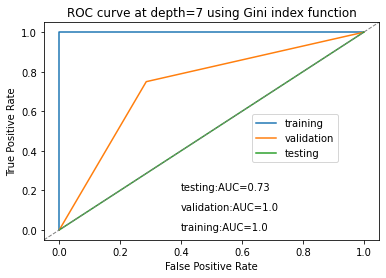

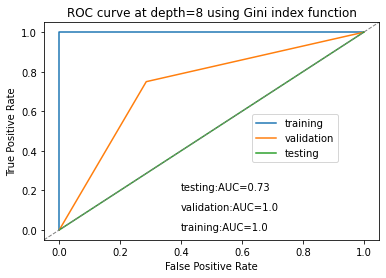

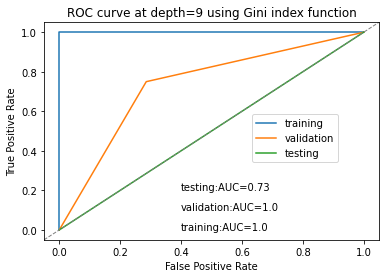

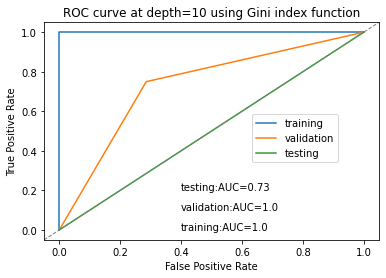

In [93]:
#cost_gini_index
model_choices_gini=[]
train_acc_gini = []
valid_acc_gini = []

n_train = hepa_y_train2.shape[0]
n_valid = hepa_y_vali.shape[0]

for k in range(1, 11):
    #print(k)
    Node.node_num = 0
    dt = DecisionTree(max_depth=k,cost_fn=cost_gini_index,min_leaf_instances=1) # create a decision tree

    dt = dt.fit(hepa_x_train2,hepa_y_train2)
    y_train_tr_prob = dt.predict(hepa_x_train2)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == hepa_y_train2)/n_train

    y_train_va_prob = dt.predict(hepa_x_vali)
    
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == hepa_y_vali)/n_valid

    model_choices_gini.append(k)
    train_acc_gini.append(acc_tr)
    valid_acc_gini.append(acc_va)
    draw_roc(hepa_y_train2,y_train_tr_pred,hepa_y_vali,y_train_va_pred,hepa_y_test,y_test_pred)
    plt.title(f"ROC curve at depth={k} using Gini index function")

best depth = 1, test accuracy = 0.9130434782608695
decipt the decision tree
node=0 is a split node: go to node 1 if feature10 <= 0.0 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


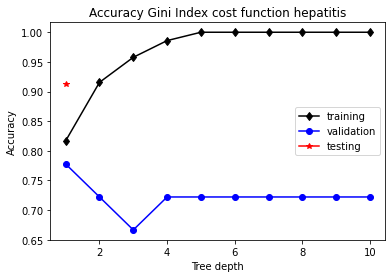

In [94]:
# use the best K to predict test data
best_depth = model_choices_gini[valid_acc_gini.index(max(valid_acc_gini))]
Node.node_num = 0
dt = DecisionTree(max_depth=best_depth,cost_fn=cost_gini_index,min_leaf_instances=1)
dt = dt.fit(hepa_x_train2, hepa_y_train2)
y_test_prob = dt.predict(hepa_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy_gini = np.sum(y_test_pred == hepa_y_test)/hepa_y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {test_accuracy_gini}')

plt.plot(model_choices_gini, train_acc_gini, marker='d', color='black', label='training')
plt.plot(model_choices_gini, valid_acc_gini, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy_gini, marker='*', color='red', label='testing')
plt.title("Accuracy Gini Index cost function hepatitis")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
depict_tree(dt)

In [95]:
def select_features(X_train, y_train, X_test):    
     # configure to select all features
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
    # transform test input data
     X_test_fs = fs.transform(X_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

# feature selection
def select_features(X_train, y_train, X_test):    
     # configure to select k best features,rank features in the same order if all the features are positively correlated with the target
     fs = SelectKBest(score_func=f_regression, k=15)
     # learn relationship from training data
     fs.fit(hepa_x_train2, hepa_y_train2)
     
     # transform train input data
     X_train_fs = fs.transform(hepa_x_train2)
    # transform test input data
     X_test_fs = fs.transform(hepa_x_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

  # feature selection
X_train_fs, X_test_fs, fs = select_features(hepa_x_train2, hepa_y_train2,hepa_x_test)

# fit the model
model = DecisionTree(max_depth=1, cost_fn=cost_gini_index, min_leaf_instances=1)
model.fit(X_train_fs, hepa_y_train2)
y_prob_fs = model.predict(X_test_fs)

#To get hard predictions by choosing the class with the maximum probability
y_pred_fs = np.argmax(y_prob_fs, axis=-1)


accuracy_fs = (np.sum(y_pred_fs == hepa_y_test)/hepa_y_test.shape[0])*100.0
print(f'accuracy using gini index is {accuracy_fs:.1f}.')

accuracy using gini index is 91.3.


# **decision boundary**

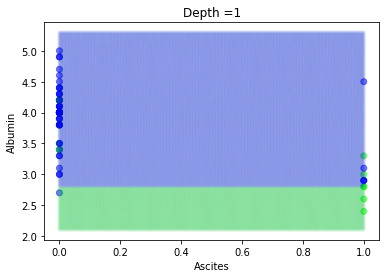

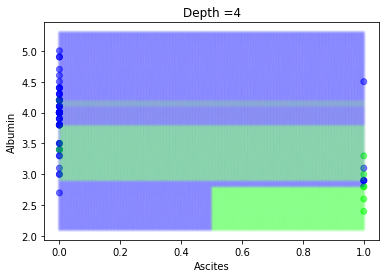

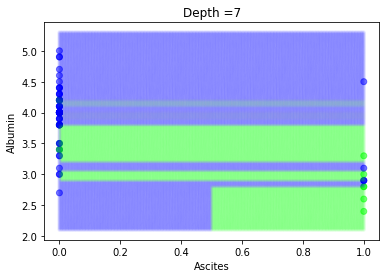

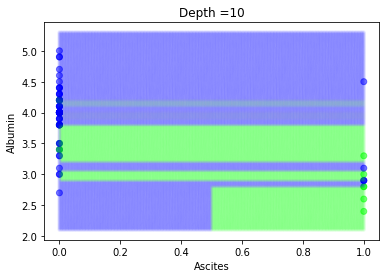

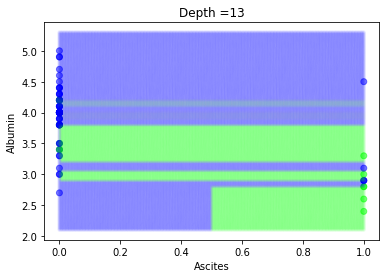

In [96]:
#first dataset using misclassfication
(num_instances, num_features), num_classes = hepatitis_x.shape, np.max(hepatitis_y)+2

x0v = np.linspace(np.min(hepatitis_x[:,11]), np.max(hepatitis_x[:,11]), 200)
x1v = np.linspace(np.min(hepatitis_x[:,16]), np.max(hepatitis_x[:,16]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for i in range(1,15,3):
    Node.node_num = 0
    model = DecisionTree(max_depth=i,cost_fn=cost_gini_index,min_leaf_instances=1)
    
    y_train_prob = np.zeros((hepa_y_train2.shape[0], num_classes))
    y_train_prob[np.arange(hepa_y_train2.shape[0]), hepatitis_y_train2] = 1
    y_prob_all = model.fit(hepa_x_train2[:,[11,16]], hepatitis_y_train2).predict(x_all)
    plt.scatter(hepa_x_train2[:,11], hepa_x_train2[:,16], c=y_train_prob, marker='o', alpha=0.5)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.05)
    plt.xlabel('Ascites')
    plt.ylabel('Albumin')
    plt.title(f'Depth ={i}')
    plt.show()

In [ ]:
#second dataset

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def draw_roc(y_train,y_train_pred,y_valid,y_valid_pred,y_test,y_test_pred):
  
  fpr1, tpr1, _ = roc_curve(y_train, y_train_pred)
  auc1 = roc_auc_score(y_train, y_train_pred)
  #vali
  fpr2, tpr2, _ = roc_curve(y_valid, y_valid_pred)
  auc2 = roc_auc_score(y_valid, y_valid_pred)
  #test
  fpr3, tpr3, _ = roc_curve(y_test, y_test_pred)
  auc3 = roc_auc_score(y_test, y_test_pred)


  #plot

  fig = plt.figure()
  plt.plot(fpr1,tpr1,label="training")
  plt.text(0.4,0,"training:AUC="+str(round(auc1,2)))

  plt.plot(fpr2,tpr2,label="validation")
  plt.text(0.4,0.1,"training:AUC="+str(round(auc1,2)))


  plt.plot(fpr3,tpr3,label="testing")
  plt.text(0.4,0.2,"testing:AUC="+str(round(auc2,2)))
  
  plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
  plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

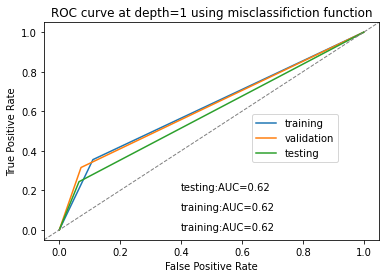

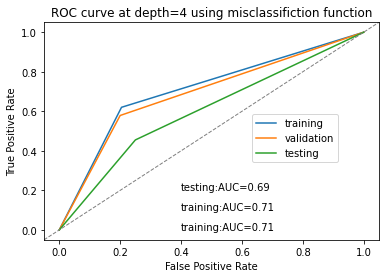

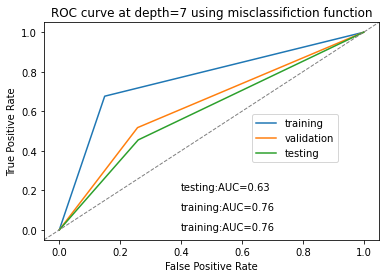

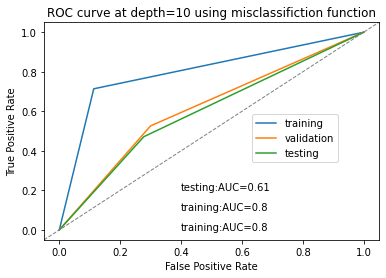

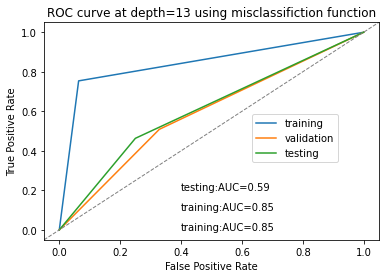

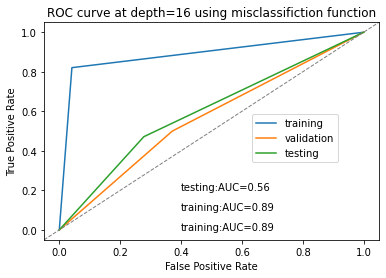

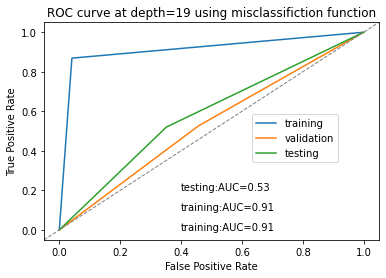

In [98]:
#misclassification
mis_model_choices=[]
mis_train_acc = []
mis_valid_acc = []


n_train = mess_y_train2.shape[0]
n_valid = mess_y_vali.shape[0]

for k in range(1, 20,3):
    #print(k)
    Node.node_num = 0
    dt = DecisionTree(max_depth=k, cost_fn=cost_misclassification, min_leaf_instances=5) # create a decision tree

    dt = dt.fit(mess_x_train2,mess_y_train2)
    y_train_tr_prob = dt.predict(mess_x_train2)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == mess_y_train2)/n_train

    y_train_va_prob = dt.predict(mess_x_vali)
    
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == mess_y_vali)/n_valid

    y_test_prob = dt.predict(mess_x_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)

    mis_model_choices.append(k)
    mis_train_acc.append(acc_tr)
    mis_valid_acc.append(acc_va)

    draw_roc(mess_y_train2,y_train_tr_pred,mess_y_vali,y_train_va_pred,mess_y_test,y_test_pred)
    plt.title(f"ROC curve at depth={k} using misclassifiction function")

best depth = 4, test accuracy = 0.5930735930735931


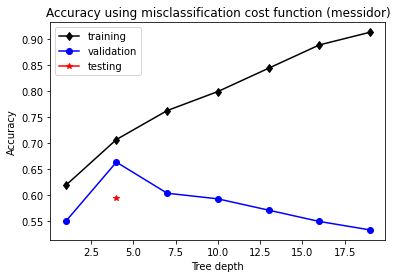

In [99]:
# use the best K to predict test data

best_depth = mis_model_choices[mis_valid_acc.index(max(mis_valid_acc))]
Node.node_num = 0
dt = DecisionTree(max_depth=best_depth, cost_fn=cost_misclassification, min_leaf_instances=5)
dt = dt.fit(mess_x_train2, mess_y_train2)
y_test_prob = dt.predict(mess_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
mis_test_accuracy = np.sum(y_test_pred == mess_y_test)/mess_y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {mis_test_accuracy}')


plt.plot(mis_model_choices, mis_train_acc, marker='d', color='black', label='training')
plt.plot(mis_model_choices, mis_valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, mis_test_accuracy, marker='*', color='red', label='testing')
plt.title("Accuracy using misclassification cost function (messidor)")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#depict_tree(dt)

Feature 0: 3.116855
Feature 1: 5.826652
Feature 2: 66.576717
Feature 3: 53.967073
Feature 4: 40.250425
Feature 5: 28.303124
Feature 6: 18.263710
Feature 7: 10.714293
Feature 8: 3.920372
Feature 9: 0.637772
Feature 10: 0.404573
Feature 11: 5.418131
Feature 12: 19.372998
Feature 13: 21.465014
Feature 14: 30.288815
Feature 15: 28.913517
Feature 16: 0.457603
Feature 17: 0.654730
Feature 18: 2.969749


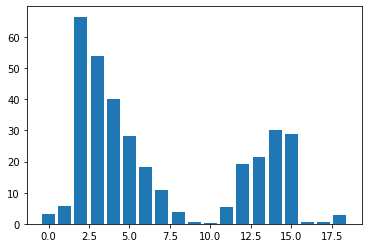

accuracy using misclassification is 61.0.


In [121]:
def select_features(X_train, y_train, X_test):    
     # configure to select all features
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
    # transform test input data
     X_test_fs = fs.transform(X_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(mess_x_train2, mess_y_train2, mess_x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# feature selection
def select_features(X_train, y_train, X_test):    
     # configure to select k best features,rank features in the same order if all the features are positively correlated with the target
     fs = SelectKBest(score_func=f_regression, k=2)
     # learn relationship from training data
     fs.fit(mess_x_train2, mess_y_train2)
     
     # transform train input data
     X_train_fs = fs.transform(mess_x_train2)
    # transform test input data
     X_test_fs = fs.transform(mess_x_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

  # feature selection
X_train_fs, X_test_fs, fs = select_features(mess_x_train2, mess_y_train2,mess_x_test)

# fit the model
model = DecisionTree(max_depth=4, cost_fn=cost_misclassification, min_leaf_instances=5)
model.fit(X_train_fs, mess_y_train2)
y_prob_fs = model.predict(X_test_fs)

#To get hard predictions by choosing the class with the maximum probability
y_pred_fs = np.argmax(y_prob_fs, axis=-1)


accuracy_fs = (np.sum(y_pred_fs == mess_y_test)/mess_y_test.shape[0])*100.0
#accuracy_euclidean = (np.sum(y_pred_euclidean == y_test_euclidean)/y_test_euclidean.shape[0])*100
print(f'accuracy using misclassification is {accuracy_fs:.1f}.')

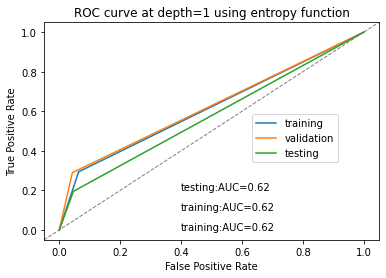

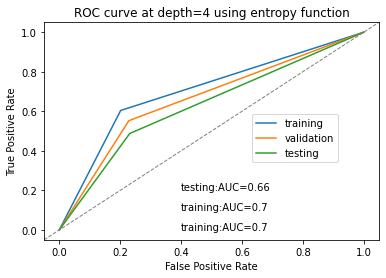

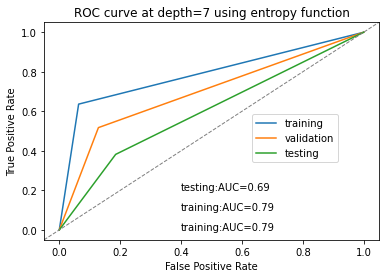

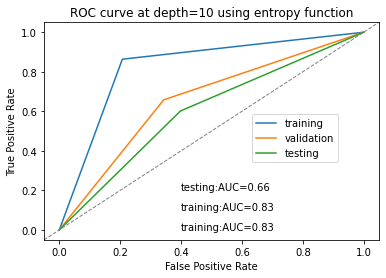

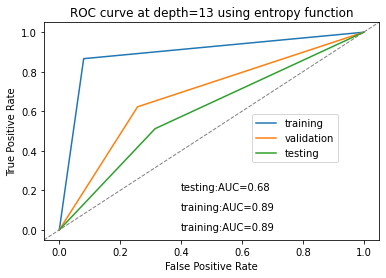

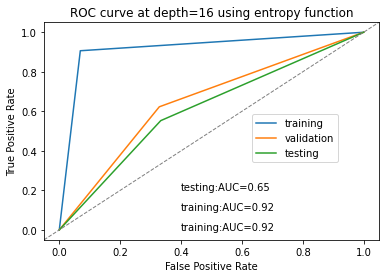

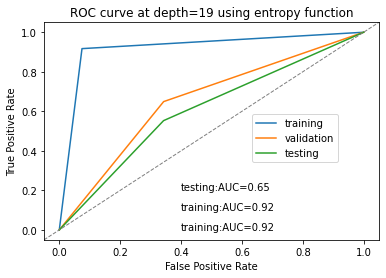

In [122]:
# cost_entropy
en_model_choices=[]
en_train_acc = []
en_valid_acc= []

n_train = mess_y_train2.shape[0]
n_valid = mess_y_vali.shape[0]

for k in range(1, 20,3):
    #print(k)
    Node.node_num = 0
    dt = DecisionTree(max_depth=k,cost_fn=cost_entropy,min_leaf_instances=10) 

    dt = dt.fit(mess_x_train2,mess_y_train2)
    y_train_tr_prob = dt.predict(mess_x_train2)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == mess_y_train2)/n_train

    y_train_va_prob = dt.predict(mess_x_vali)
    
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == mess_y_vali)/n_valid

    y_test_prob = dt.predict(mess_x_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)

    
    en_model_choices.append(k)
    en_train_acc.append(acc_tr)
    en_valid_acc.append(acc_va)
    draw_roc(mess_y_train2,y_train_tr_pred,mess_y_vali,y_train_va_pred,mess_y_test,y_test_pred)
    plt.title(f"ROC curve at depth={k} using entropy function")

best depth = 13, test accuracy = 0.5151515151515151


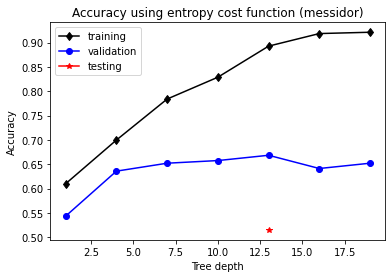

In [123]:
# use the best K to predict test data
best_depth = en_model_choices[en_valid_acc.index(max(en_valid_acc))]
Node.node_num = 0
dt = DecisionTree(max_depth=best_depth,cost_fn=cost_entropy,min_leaf_instances=10)
dt = dt.fit(mess_x_train2, mess_y_train)
y_test_prob = dt.predict(mess_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
en_test_accuracy = np.sum(y_test_pred ==mess_y_test)/mess_y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {en_test_accuracy}')

plt.plot(en_model_choices, en_train_acc, marker='d', color='black', label='training')
plt.plot(en_model_choices, en_valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, en_test_accuracy, marker='*', color='red', label='testing')
plt.title("Accuracy using entropy cost function (messidor)")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#depict_tree(dt)

Feature 0: 3.116855
Feature 1: 5.826652
Feature 2: 66.576717
Feature 3: 53.967073
Feature 4: 40.250425
Feature 5: 28.303124
Feature 6: 18.263710
Feature 7: 10.714293
Feature 8: 3.920372
Feature 9: 0.637772
Feature 10: 0.404573
Feature 11: 5.418131
Feature 12: 19.372998
Feature 13: 21.465014
Feature 14: 30.288815
Feature 15: 28.913517
Feature 16: 0.457603
Feature 17: 0.654730
Feature 18: 2.969749


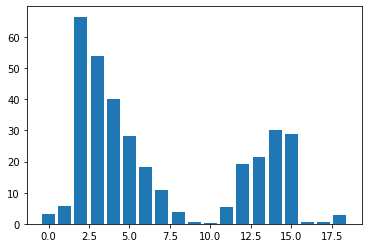

accuracy using entropy is 59.3.


In [124]:
def select_features(X_train, y_train, X_test):    
     # configure to select all features
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
    # transform test input data
     X_test_fs = fs.transform(X_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(mess_x_train2, mess_y_train2, mess_x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# feature selection
def select_features(X_train, y_train, X_test):    
     # configure to select k best features,rank features in the same order if all the features are positively correlated with the target
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(mess_x_train2, mess_y_train2)
     
     # transform train input data
     X_train_fs = fs.transform(mess_x_train2)
    # transform test input data
     X_test_fs = fs.transform(mess_x_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

  # feature selection
X_train_fs, X_test_fs, fs = select_features(mess_x_train2, mess_y_train2,mess_x_test)

# fit the model
model = DecisionTree(max_depth=13, cost_fn=cost_entropy, min_leaf_instances=10)
model.fit(X_train_fs, mess_y_train2)
y_prob_fs = model.predict(X_test_fs)

#To get hard predictions by choosing the class with the maximum probability
y_pred_fs = np.argmax(y_prob_fs, axis=-1)


accuracy_fs = (np.sum(y_pred_fs == mess_y_test)/mess_y_test.shape[0])*100.0
#accuracy_euclidean = (np.sum(y_pred_euclidean == y_test_euclidean)/y_test_euclidean.shape[0])*100
print(f'accuracy using entropy is {accuracy_fs:.1f}.')

In [ ]:
#cost_gini_index
gini_model_choices=[]
gini_train_acc = []
gini_valid_acc = []
gini_test_accs_fs = []

n_train = mess_y_train2.shape[0]
n_valid = mess_y_vali.shape[0]

for k in range(1, 11):
    #print(k)
    Node.node_num = 0
    dt = DecisionTree(max_depth=k,cost_fn=cost_gini_index,min_leaf_instances=5) # create a decision tree

    dt = dt.fit(mess_x_train2,mess_y_train2)
    y_train_tr_prob = dt.predict(mess_x_train2)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = np.sum(y_train_tr_pred == mess_y_train2)/n_train

    y_train_va_prob = dt.predict(mess_x_vali)
    
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = np.sum(y_train_va_pred == mess_y_vali)/n_valid

    gini_model_choices.append(k)
    gini_train_acc.append(acc_tr)
    gini_valid_acc.append(acc_va)
    draw_roc(mess_y_train2,y_train_tr_pred,mess_y_vali,y_train_va_pred,mess_y_test,y_test_pred)
    plt.title(f"ROC curve at depth={k} using Gini Index function")

In [ ]:
# use the best K to predict test data

best_depth = gini_model_choices[gini_valid_acc.index(max(gini_valid_acc))]
Node.node_num = 0
dt = DecisionTree(max_depth=best_depth,cost_fn=cost_gini_index, min_leaf_instances=5)
dt = dt.fit(mess_x_train2, mess_y_train2)
y_test_prob = dt.predict(mess_x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
gini_test_accuracy = np.sum(y_test_pred == mess_y_test)/mess_y_test.shape[0]
print(f'best depth = {best_depth}, test accuracy = {gini_test_accuracy}')

plt.plot(gini_model_choices, gini_train_acc, marker='d', color='black', label='training')
plt.plot(gini_model_choices, gini_valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, gini_test_accuracy, marker='*', color='red', label='testing')
plt.title("Accuracy using Gini Index cost function (messidor)")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
#depict_tree(dt)

Feature 0: 3.116855
Feature 1: 5.826652
Feature 2: 66.576717
Feature 3: 53.967073
Feature 4: 40.250425
Feature 5: 28.303124
Feature 6: 18.263710
Feature 7: 10.714293
Feature 8: 3.920372
Feature 9: 0.637772
Feature 10: 0.404573
Feature 11: 5.418131
Feature 12: 19.372998
Feature 13: 21.465014
Feature 14: 30.288815
Feature 15: 28.913517
Feature 16: 0.457603
Feature 17: 0.654730
Feature 18: 2.969749


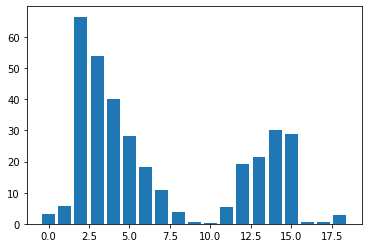

accuracy using eculidean is 63.6.


In [125]:
def select_features(X_train, y_train, X_test):    
     # configure to select all features
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
    # transform test input data
     X_test_fs = fs.transform(X_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(mess_x_train2, mess_y_train2, mess_x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# feature selection
def select_features(X_train, y_train, X_test):    
     # configure to select k best features,rank features in the same order if all the features are positively correlated with the target
     fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
     fs.fit(mess_x_train2, mess_y_train2)
     
     # transform train input data
     X_train_fs = fs.transform(mess_x_train2)
    # transform test input data
     X_test_fs = fs.transform(mess_x_test)
     #return X_train_fs, X_test_fs, fs 
     return X_train_fs, X_test_fs, fs

  # feature selection
X_train_fs, X_test_fs, fs = select_features(mess_x_train2, mess_y_train2,mess_x_test)

# fit the model
model = DecisionTree(max_depth=8, cost_fn=cost_gini_index, min_leaf_instances=5)
model.fit(X_train_fs, mess_y_train2)
y_prob_fs = model.predict(X_test_fs)

#To get hard predictions by choosing the class with the maximum probability
y_pred_fs = np.argmax(y_prob_fs, axis=-1)


accuracy_fs = (np.sum(y_pred_fs == mess_y_test)/mess_y_test.shape[0])*100.0
#accuracy_euclidean = (np.sum(y_pred_euclidean == y_test_euclidean)/y_test_euclidean.shape[0])*100
print(f'accuracy using eculidean is {accuracy_fs:.1f}.')

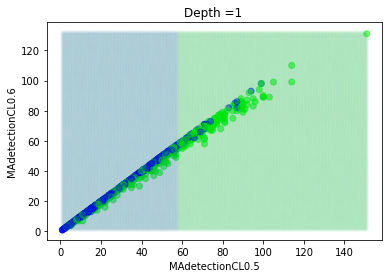

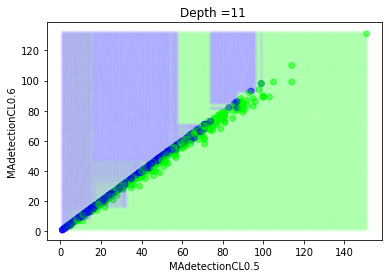

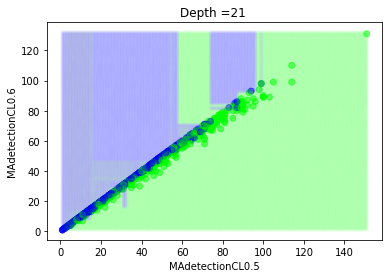

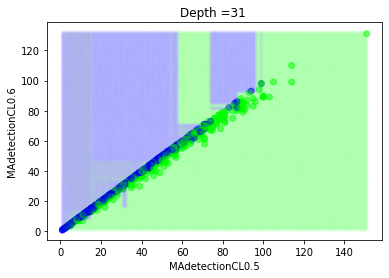

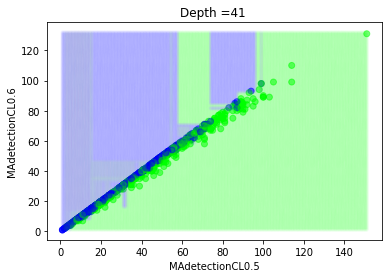

In [126]:
#second dataset using gini_index
(num_instances, num_features), num_classes = messidor_x.shape, np.max(messidor_y)+2

x0v = np.linspace(np.min(messidor_x[:,2]), np.max(messidor_x[:,2]), 200)
x1v = np.linspace(np.min(messidor_x[:,3]), np.max(messidor_x[:,3]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for i in range(1,50,10):
    Node.node_num = 0
    model = DecisionTree(max_depth=i,cost_fn=cost_gini_index)
    y_train_prob = np.zeros((messidor_y_train2.shape[0], num_classes))
    y_train_prob[np.arange(messidor_y_train2.shape[0]), messidor_y_train2] = 1
    y_prob_all = model.fit(mess_x_train2[:,[2,3]], messidor_y_train2).predict(x_all)
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    plt.scatter(mess_x_train2[:,2], mess_x_train2[:,3], c=y_train_prob, marker='o', alpha=0.5)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.03)
    plt.ylabel('MAdetectionCL0.6')
    plt.xlabel('MAdetectionCL0.5')
    plt.title(f'Depth ={i} ')
    plt.show()